# Avocado dataset


### Data dictionary:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold (Small/Medium Hass Avocado (3-5oz avocado))
- 4225 - Total number of avocados with PLU 4225 sold (Large Hass Avocado (8-10oz avocado))
- 4770 - Total number of avocados with PLU 4770 sold (Extra Large Hass Avocado (10-15oz avocado))

#### Dataset source: https://www.kaggle.com/neuromusic/avocado-prices


### By: 

- Conor Sheehan (sba 20128) 
- Eric Parfrey (sba 20129) 
- Giuliano Silva (sba 20130) 
- Hasan Aziz (sba 20140)


# Summary 


### 1) Data Understanding (EDA)

- Understanding the data 
- Data visualization


### 2) Descriptive and Inferential Statistics


- Central Tendency Measures
- Cardinality
- Numerical variables visualization: Scatterplots + Histogram
- Categorical variables visualization: Barcharts
- Correlation + Feature importance
- Test of independence: Chi-square test
- Analysis of variance: ANOVA tes one-way and two-ways using OLS

### 3) Data Preparation

- Creating new variables
- Mapping features
- Dummy enconding
- Dropping features
- Filtering zero values


### 4) Statistical tests for Regression

- Residual analysis (Based on Noel's class)
- Autocorrelation of the residuals (Based on Noel's class)

### 5) Preprocessing variables

- Scaling the independent variables before the modelling part using StandardScaler

### 6) Regression Models 
#### Target variable: `AveragePrice`
- Linear Regression 
- Ridge Regression + Hypertunning 
- Lasso Regression + Hypertunning 

### 7) Principal Components Analysis (PCA) 
#### `Dimensionality Reduction`


- Linear Regression + PCA
- Ridge Regression + Hypertunning + PCA
- Lasso Regression + Hypertunning + PCA

### 8 ) Classification model 
#### Target variable: `Type`: conventional or organic
- Logistic Regression
- Logistic Regression + Hypertunning
- Confusion matrix + ROC curve

# Import Libraries

In [133]:
# Basic library
import numpy as np 
import pandas as pd 
import math

# Statistics library
from scipy.stats import norm
from scipy import stats
import scipy as sy
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.anova as anova
import statistics as st
import plotly.graph_objects as go

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
# for Data preparation
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA


# for Machine Learning

from sklearn.linear_model import*
from sklearn.ensemble import*
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 1) Data Understanding / EDA 

In [135]:
# Read the dataset and show the top 5 rows
avocado=pd.read_csv('avocado.csv')
avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [136]:
# Check to see the viability to apply Classification tasks

avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

The first impression of the dataset is that we need to split the Date into months because we already have a feature 'Year'. Second, the variable type can be used as our categorical variable to be transformed into Dummy Enconded, meaning value from 0 and 1, by doing that we will be able to use the Logistic Regression. 

In [137]:
# Check info -- datatypes

avocado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Every datatype seems to be ok for this first analysis. 

In [138]:
# Check the shape of the dataframe

print('shape of the data :',avocado.shape)

shape of the data : (18249, 14)


- Rows: 18,249
- Columns: 14 

In [139]:
# Create column month 

avocado['month'] = avocado['Date'].apply(lambda x: x.split('-')[1])
avocado['month'] = avocado.month.astype('int64')

# Check
avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  month  
0  2015  Albany     12  
1  2015  Albany     12  
2  2015  Albany     12  
3  2015  Albany     12  
4  2015  Albany     11

In [140]:
# Rename the columns to a proper name

avocado.rename(columns={'4046': 'Small_Medium', '4225': 'Large', '4770': 'ExtraLarge'}, inplace=True)

# Check
avocado.head()

Unnamed: 0        Date  AveragePrice  Total Volume  Small_Medium  \
0           0  2015-12-27          1.33      64236.62       1036.74   
1           1  2015-12-20          1.35      54876.98        674.28   
2           2  2015-12-13          0.93     118220.22        794.70   
3           3  2015-12-06          1.08      78992.15       1132.00   
4           4  2015-11-29          1.28      51039.60        941.48   

       Large  ExtraLarge  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0   54454.85       48.16     8696.87     8603.62       93.25          0.0   
1   44638.81       58.33     9505.56     9408.07       97.49          0.0   
2  109149.67      130.50     8145.35     8042.21      103.14          0.0   
3   71976.41       72.58     5811.16     5677.40      133.76          0.0   
4   43838.39       75.78     6183.95     5986.26      197.69          0.0   

           type  year  region  month  
0  conventional  2015  Albany     12  
1  conventional  2015  Albany     12  
2  conventional  2015  Albany     12  
3  conventional  2015  Albany     12  
4  conventional  2015  Albany     11

In [141]:
# Check null values

avocado.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
Small_Medium    0
Large           0
ExtraLarge      0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
dtype: int64

We don't have any missing values for this dataset. 

We are going to analyse all the variables and afterwards explain how would we deal with missing values.

One thing is for sure we won't use the features 'Unnamed: 0' and 'Date' instead we will create a new feature month from the Date and delete it to avoid redundancy. 

In [142]:
# number of unique regions

len(avocado['region'].unique())

54

In [143]:
# First, cleaning the TotalUS because it's the total of all regions

avocado = avocado[avocado.region != "TotalUS"]

In [144]:
# Check

avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17911 non-null  int64  
 1   Date          17911 non-null  object 
 2   AveragePrice  17911 non-null  float64
 3   Total Volume  17911 non-null  float64
 4   Small_Medium  17911 non-null  float64
 5   Large         17911 non-null  float64
 6   ExtraLarge    17911 non-null  float64
 7   Total Bags    17911 non-null  float64
 8   Small Bags    17911 non-null  float64
 9   Large Bags    17911 non-null  float64
 10  XLarge Bags   17911 non-null  float64
 11  type          17911 non-null  object 
 12  year          17911 non-null  int64  
 13  region        17911 non-null  object 
 14  month         17911 non-null  int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 2.2+ MB


/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


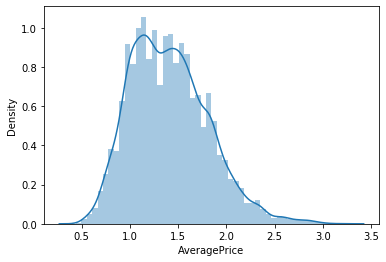

In [145]:
# Price distribution

plt.figure(figsize=(6,4))
sns.distplot(avocado["AveragePrice"])

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

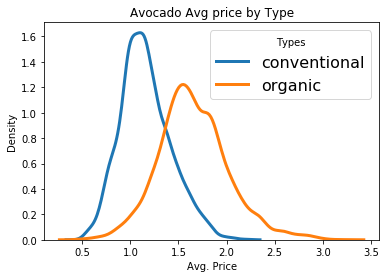

In [146]:
# List of types
types = ['conventional', 'organic']

# Iterate through the five airlines
for i in types:
    # Subset to the airline
    subset = avocado[avocado['type'] == i]
    
    # Draw the density plot
    sns.distplot(subset['AveragePrice'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Types')
plt.title('Avocado Avg price by Type')
plt.xlabel('Avg. Price')
plt.ylabel('Density')

In [147]:
# Average Price by regions

avg_per_region = avocado.groupby("region")["AveragePrice"].mean()
avoc1 = pd.DataFrame(avg_per_region)
avoc1 = pd.DataFrame(avoc1.AveragePrice.sort_values(ascending=False))
avoc1.head(5)

AveragePrice
region                           
HartfordSpringfield      1.818639
SanFrancisco             1.804201
NewYork                  1.727574
Philadelphia             1.632130
Sacramento               1.621568

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

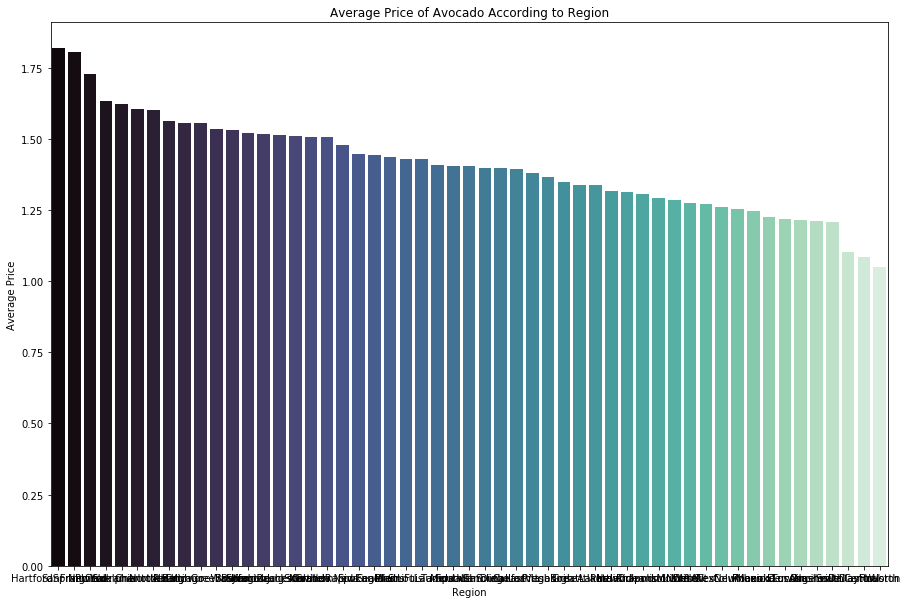

In [148]:
# Average price by region

plt.figure(figsize=(15,10))
sns.barplot(x=avoc1.index, y=avoc1.AveragePrice, palette="mako")

#plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

In [149]:
# Average price by region and type
# Ascending true + Top 5
# Create avoc2 to use for Data Visualization

avg_per_region_and_type = avocado.groupby(["type", "region"])["AveragePrice"].mean()
avoc2 = pd.DataFrame(avg_per_region_and_type)
avoc2 = pd.DataFrame(avoc2.AveragePrice.sort_values(ascending=False))
avoc2.reset_index(level=0, inplace=True)
avoc2.head()

type  AveragePrice
region                                    
HartfordSpringfield  organic      2.229231
SanFrancisco         organic      2.211243
NewYork              organic      2.053018
Sacramento           organic      1.969172
Charlotte            organic      1.936982

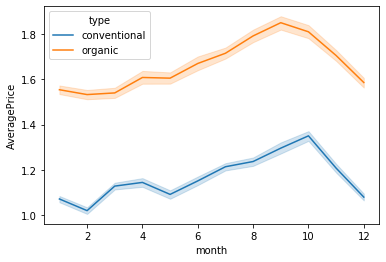

In [150]:
# Linechart (price and month) by type
plt.figure(figsize=(6,4))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=avocado)
plt.show()

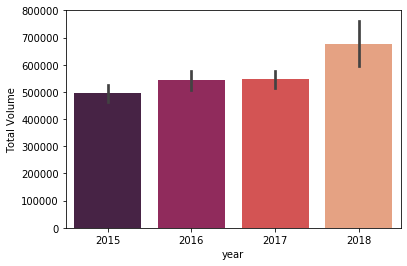

In [151]:
# Total volume through the year

plt.figure(figsize=(6,4))
sns.barplot(x="year", y="Total Volume", palette="rocket", data=avocado)

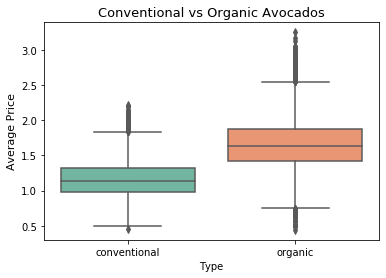

In [152]:
plt.figure(figsize=(6,4))
sns.boxplot(x='type', y='AveragePrice', palette="Set2", data=avocado)

plt.xlabel('Type')
plt.ylabel('Average Price', size=11)
plt.title('Conventional vs Organic Avocados', size=13)

plt.show()

In [153]:
sales_by_region = avocado.groupby('region')['Total Volume'].sum().reset_index()
sales_by_region = sales_by_region.sort_values('Total Volume',ascending=False)

top_10 = sales_by_region[:6]
top_10

region  Total Volume
51          West  1.086779e+09
6     California  1.028982e+09
45  SouthCentral  1.011280e+09
29     Northeast  7.132809e+08
46     Southeast  6.152384e+08
15    GreatLakes  5.896425e+08

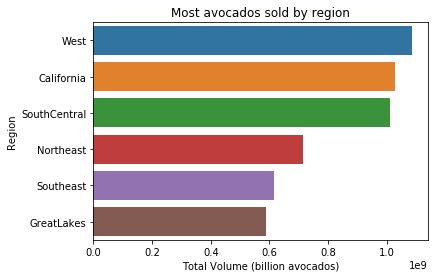

In [154]:
# Total number of avocados sold within the US between 2015 and 2018

plt.figure(figsize=(6,4))

sns.barplot(x='Total Volume', y='region', orient='h', data=top_10 )

plt.title('Most avocados sold by region')
plt.ylabel('Region')
plt.xlabel('Total Volume (billion avocados)')

plt.show()

<Figure size 432x288 with 0 Axes>

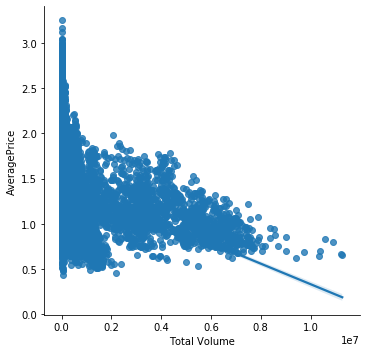

In [155]:
# Price x Total Volume
plt.figure(figsize=(6,4))
sns.lmplot(x="Total Volume",y="AveragePrice",data=avocado)

# 2) Descriptive Statistics



In [156]:
# Check info 

avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    17911 non-null  int64  
 1   Date          17911 non-null  object 
 2   AveragePrice  17911 non-null  float64
 3   Total Volume  17911 non-null  float64
 4   Small_Medium  17911 non-null  float64
 5   Large         17911 non-null  float64
 6   ExtraLarge    17911 non-null  float64
 7   Total Bags    17911 non-null  float64
 8   Small Bags    17911 non-null  float64
 9   Large Bags    17911 non-null  float64
 10  XLarge Bags   17911 non-null  float64
 11  type          17911 non-null  object 
 12  year          17911 non-null  int64  
 13  region        17911 non-null  object 
 14  month         17911 non-null  int64  
dtypes: float64(9), int64(3), object(3)
memory usage: 2.8+ MB


In [157]:
# Differentiate numerical features and categorical features

categorical_features = avocado.select_dtypes(include = ["object"]).columns
numerical_features = avocado.select_dtypes(exclude = ["object"]).columns

print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
avoc_num = avocado[numerical_features]
avoc_cat = avocado[categorical_features]

Numerical features : 12
Categorical features : 3


In [158]:
# Statistical metric for continuous variables -- range (count), mean, std, min, percentiles and max

avoc_num.describe().T

count           mean           std      min        25%  \
Unnamed: 0    17911.0      24.232148  1.548100e+01     0.00     10.000   
AveragePrice  17911.0       1.407619  4.042530e-01     0.44      1.100   
Total Volume  17911.0  539258.690838  1.224332e+06    84.56  10571.020   
Small_Medium  17911.0  183807.409290  5.151059e+05     0.00    819.660   
Large         17911.0  188223.112232  4.519856e+05     0.00   2909.610   
ExtraLarge    17911.0   14551.234381  4.881754e+04     0.00      0.000   
Total Bags    17911.0  152675.731028  3.645992e+05     0.00   4905.195   
Small Bags    17911.0  116202.868898  2.787596e+05     0.00   2700.335   
Large Bags    17911.0   34505.693530  1.139477e+05     0.00    112.995   
XLarge Bags   17911.0    1967.168041  8.186402e+03     0.00      0.000   
year          17911.0    2016.147898  9.399389e-01  2015.00   2015.000   
month         17911.0       6.177210  3.534132e+00     1.00      3.000   

                    50%         75%          max  
Unnamed: 0        24.00      38.000        52.00  
AveragePrice       1.37       1.670         3.25  
Total Volume  100154.13  400176.680  11274749.11  
Small_Medium    7824.43  101488.815   5160896.68  
Large          26701.99  131755.215   5402444.45  
ExtraLarge       164.23    5736.735    804558.25  
Total Bags     37551.02  103691.600   4145406.70  
Small Bags     24530.62   79282.590   3403581.49  
Large Bags      2459.22   19421.705   2838239.39  
XLarge Bags        0.00     106.760    131300.76  
year            2016.00    2017.000      2018.00  
month              6.00       9.000        12.00

For the categorical variables we will first restructure the Date as datetime and create a column 'month' in order to delete the column Date because it won't be useful for our analysis. 

## 2.1) Scatterplots of all numerical variables


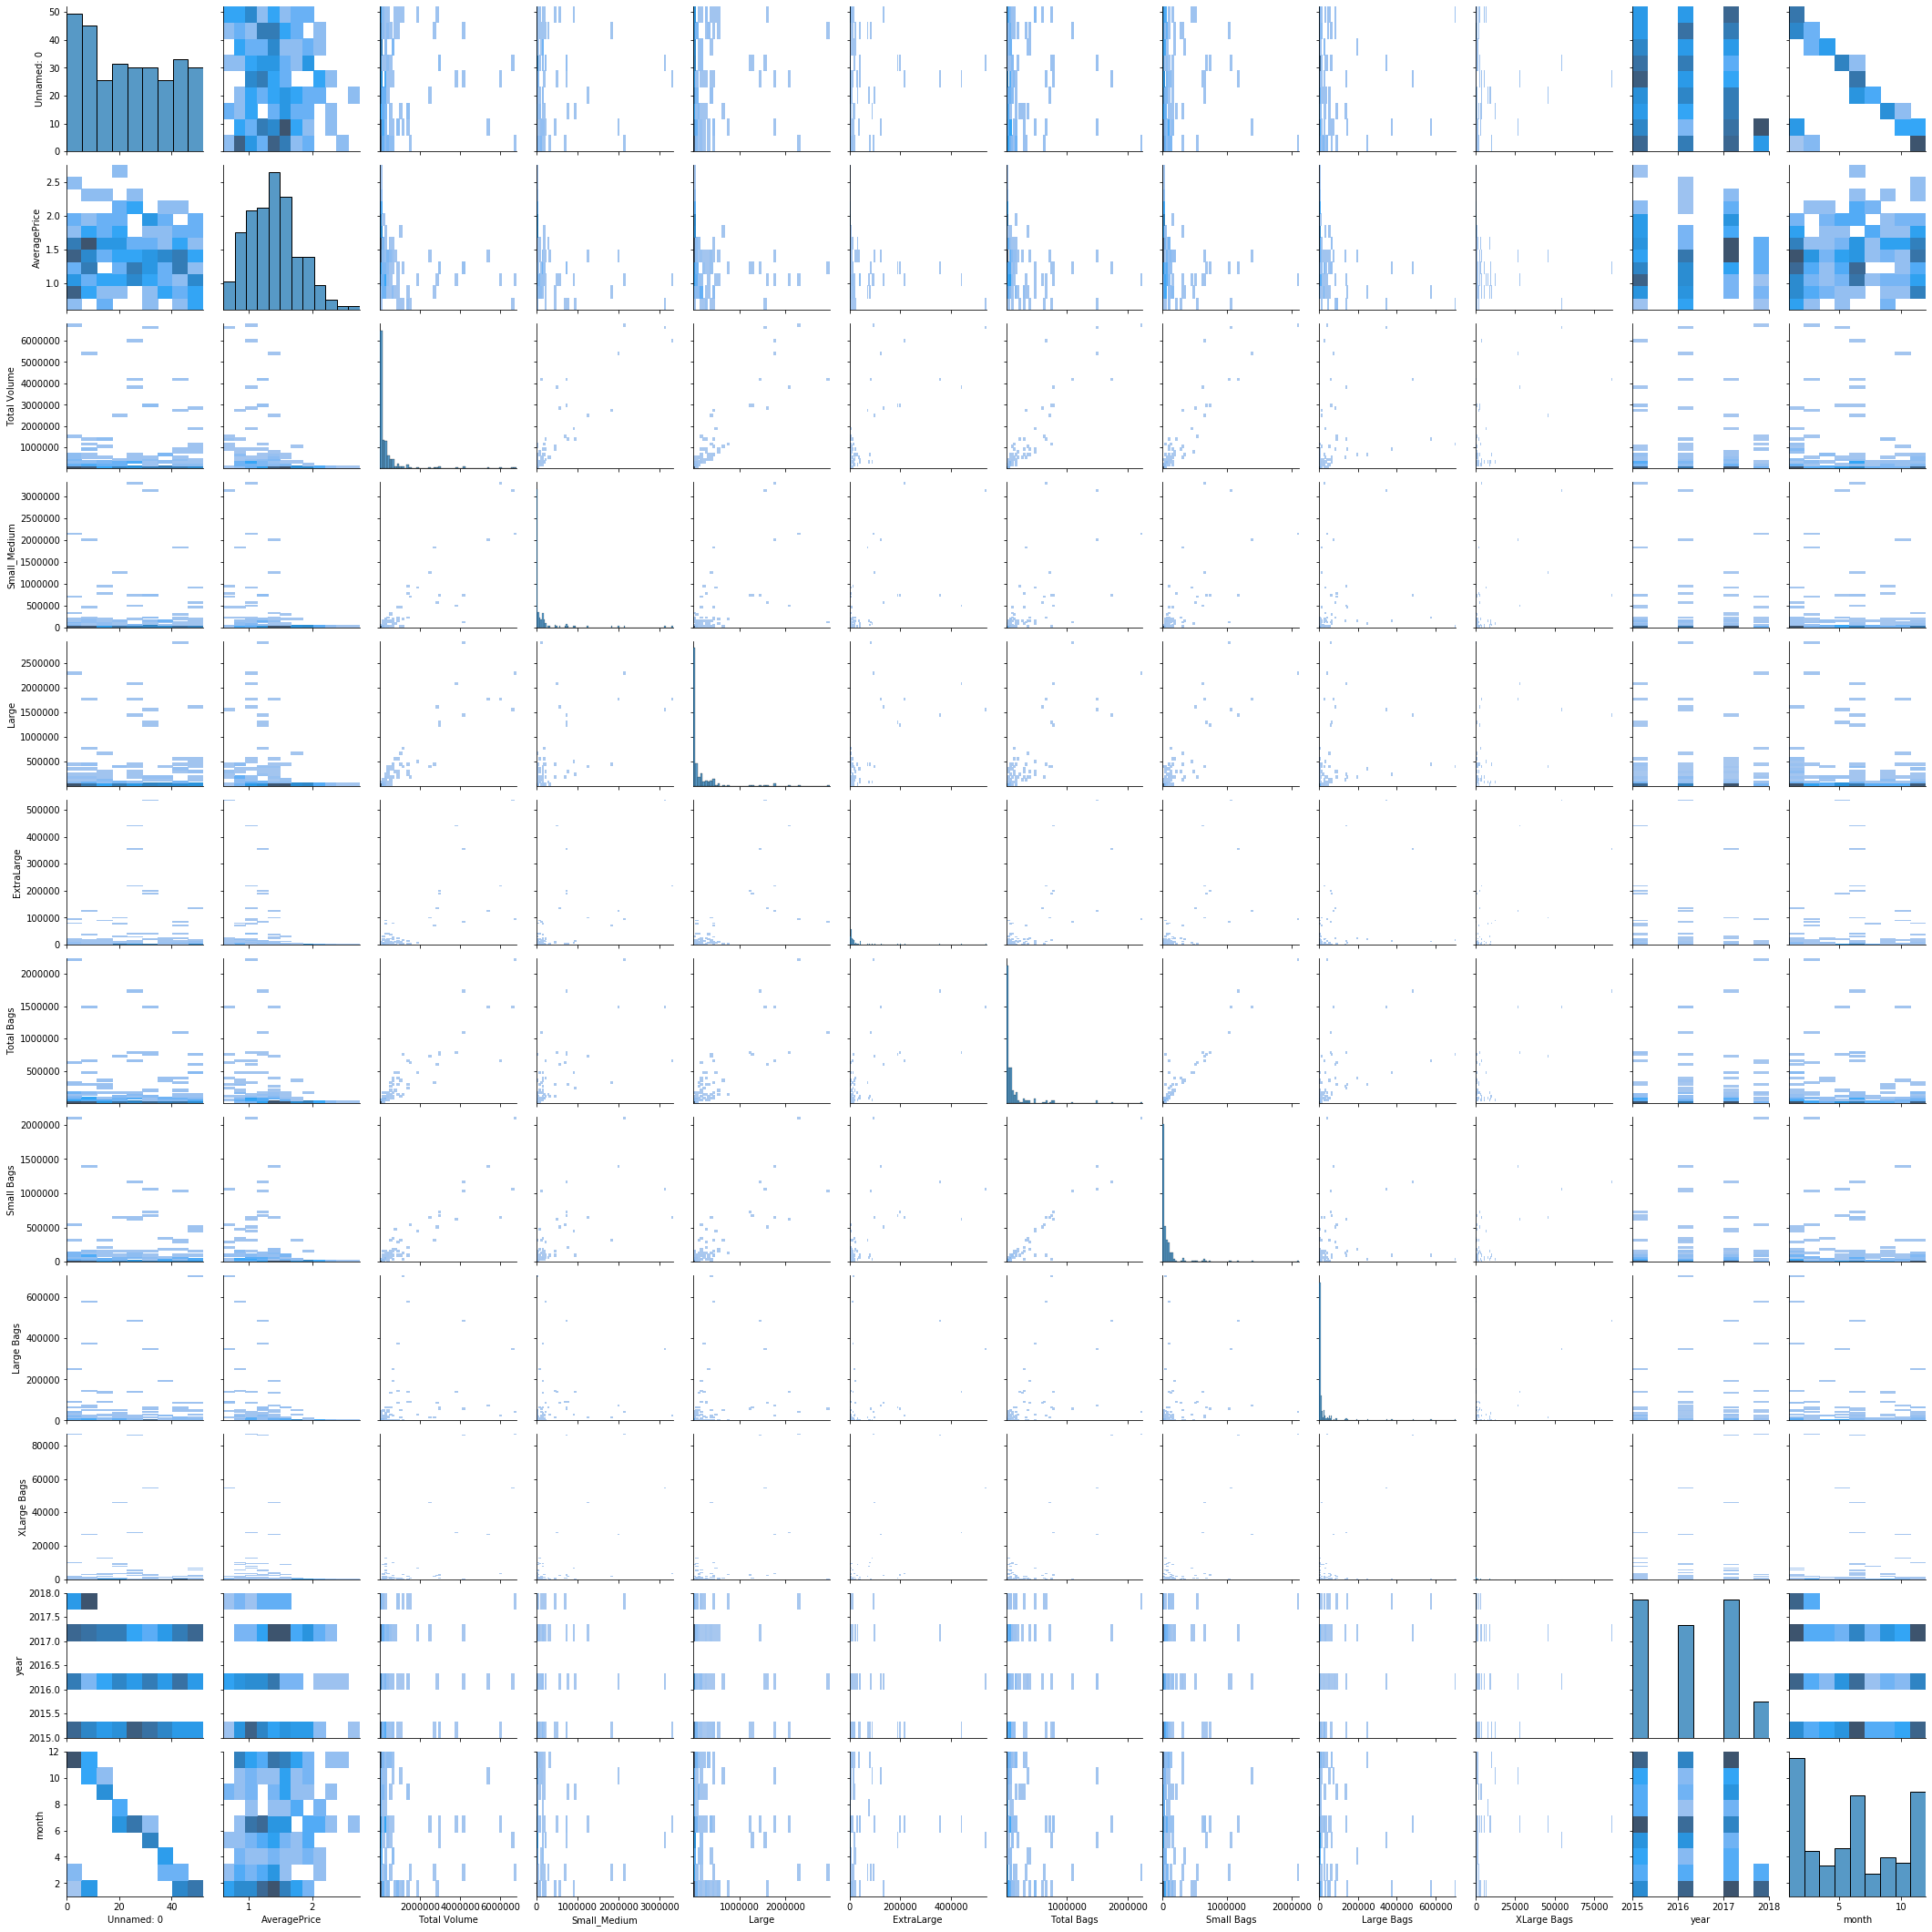

In [583]:
# taking 200 hundred samples to run quicker

sns.pairplot(avocado.sample(200), kind="hist")

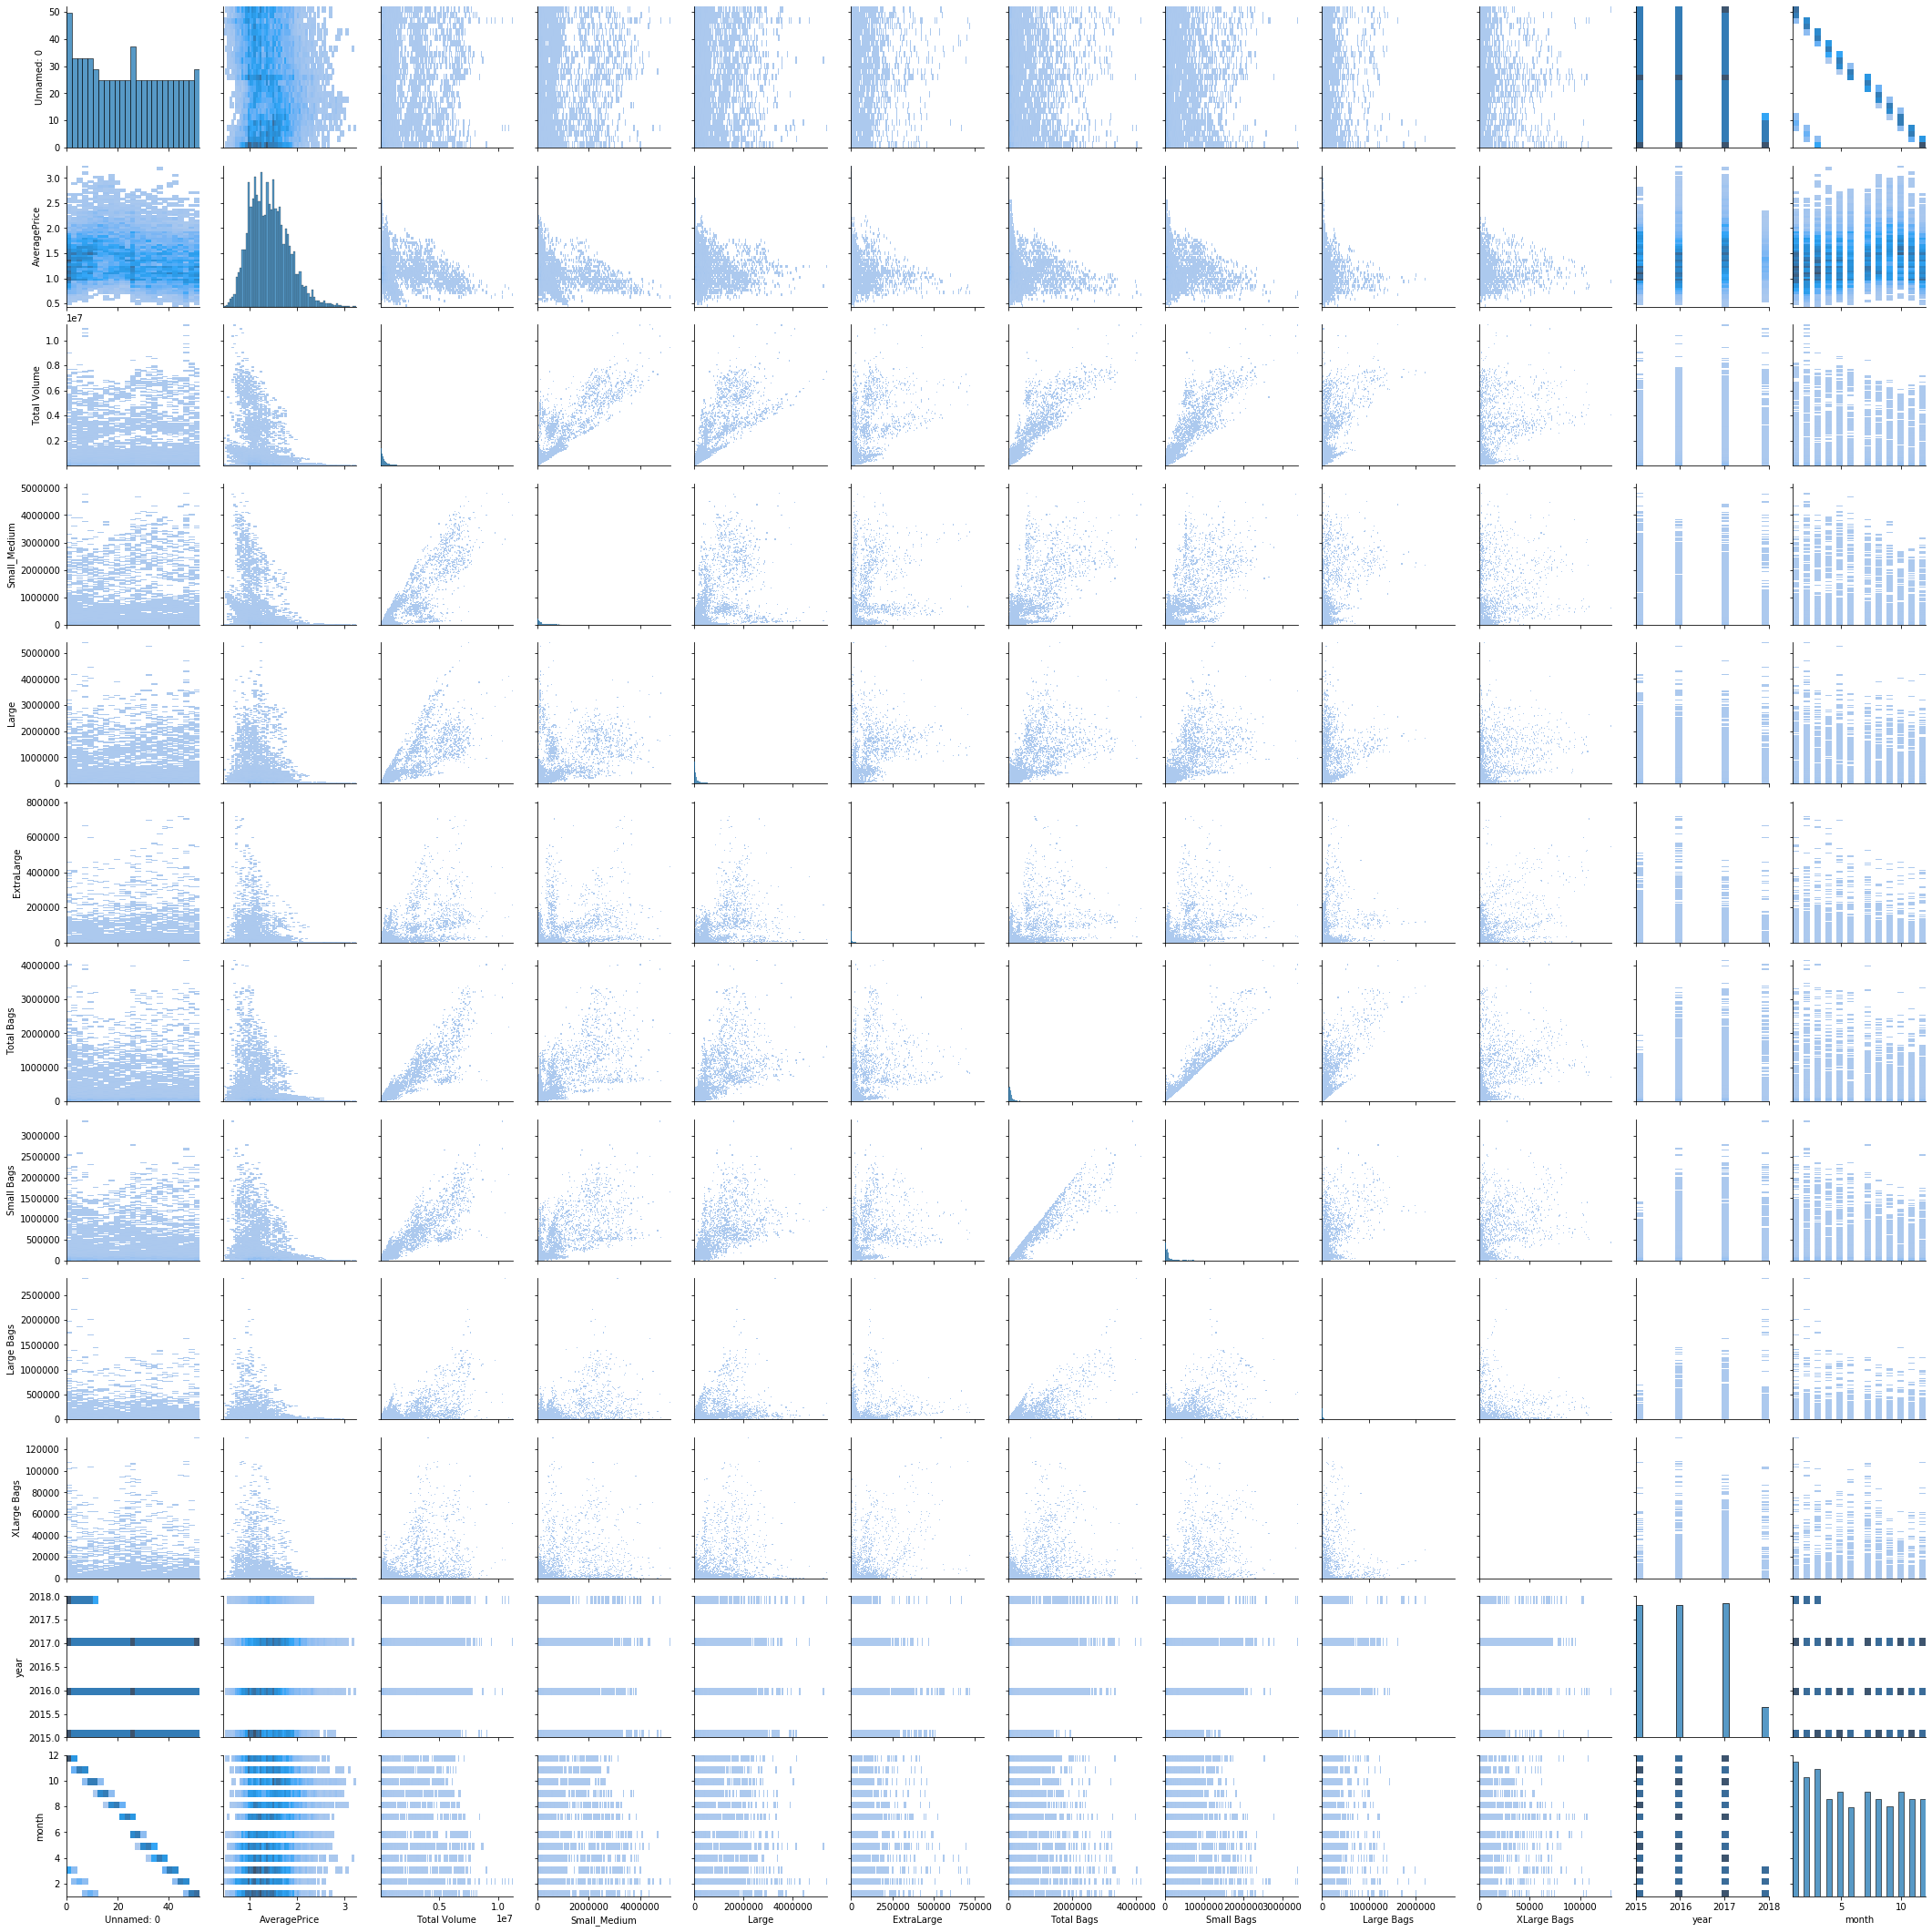

In [376]:
# Full 

sns.pairplot(avocado, kind="hist")

## 2.2) Numerical variables distribution

In [159]:
# Setting the font size of all labels

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

Text(0.5, 1.0, 'Extra Large avocado distribution')

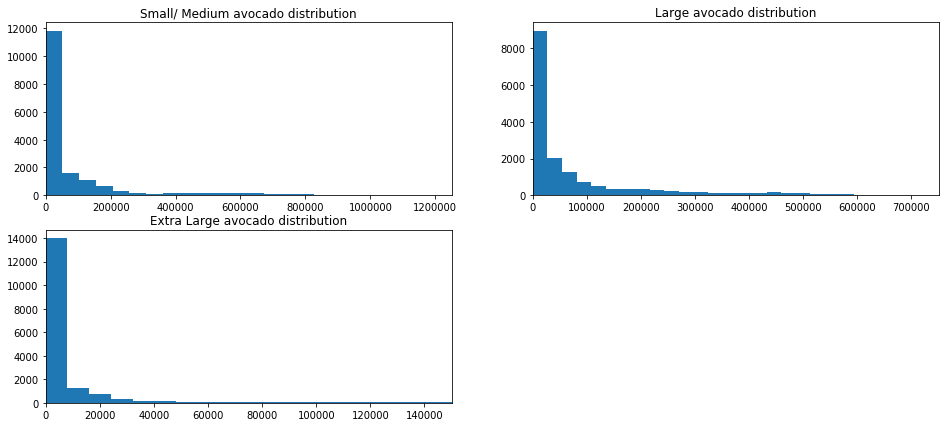

In [160]:
# Independent variables distribution part 1.
plt.figure(figsize=(16,7))



plt.subplot(2,2,1)
plt.hist(avocado["Small_Medium"], bins = 100)
plt.xlim([0,1250000])
plt.title('Small/ Medium avocado distribution')

plt.subplot(2,2,2)
plt.hist(avocado["Large"], bins = 200)
plt.xlim([0,750000])
plt.title('Large avocado distribution')

plt.subplot(2,2,3)
plt.hist(avocado["ExtraLarge"], bins = 100)
plt.xlim([0,150000])
plt.title('Extra Large avocado distribution')



Text(0.5, 1.0, 'XLarge bag avocado distribution')

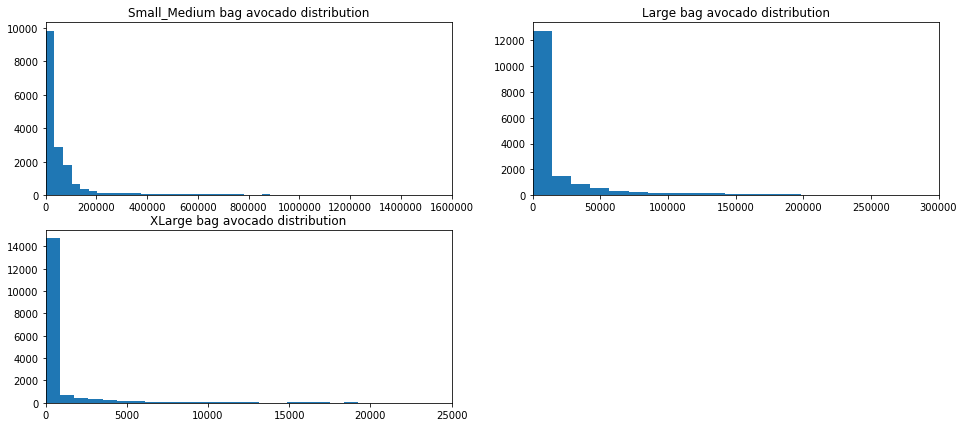

In [161]:
# Independent variables distribution part 2

plt.figure(figsize=(16,7))

plt.subplot(2,2,1)
plt.hist(avocado["Small Bags"], bins = 100)
plt.xlim([0,1600000])
plt.title('Small_Medium bag avocado distribution')

plt.subplot(2,2,2)
plt.hist(avocado["Large Bags"], bins = 200)
plt.xlim([0,300000])
plt.title('Large bag avocado distribution')

plt.subplot(2,2,3)
plt.hist(avocado["XLarge Bags"], bins = 150)
plt.xlim([0,25000])
plt.title('XLarge bag avocado distribution')

In [162]:
# Excluding features that will not help or are redundant

avoc_num.drop(columns=['Unnamed: 0','Total Bags', 'Total Volume'], inplace = True)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [163]:
# Correlation of numerical variables

avoc_num.corr()

AveragePrice  Small_Medium     Large  ExtraLarge  Small Bags  \
AveragePrice      1.000000     -0.342105 -0.267643   -0.241213   -0.296151   
Small_Medium     -0.342105      1.000000  0.603442    0.509280    0.761604   
Large            -0.267643      0.603442  1.000000    0.623368    0.782892   
ExtraLarge       -0.241213      0.509280  0.623368    1.000000    0.566304   
Small Bags       -0.296151      0.761604  0.782892    0.566304    1.000000   
Large Bags       -0.248909      0.589649  0.466107    0.343136    0.613817   
XLarge Bags      -0.154424      0.436249  0.449903    0.587963    0.587470   
year              0.091897      0.004244 -0.015449   -0.050252    0.108639   
month             0.161463     -0.039269 -0.037382   -0.046055   -0.039521   

              Large Bags  XLarge Bags      year     month  
AveragePrice   -0.248909    -0.154424  0.091897  0.161463  
Small_Medium    0.589649     0.436249  0.004244 -0.039269  
Large           0.466107     0.449903 -0.015449 -0.037382  
ExtraLarge      0.343136     0.587963 -0.050252 -0.046055  
Small Bags      0.613817     0.587470  0.108639 -0.039521  
Large Bags      1.000000     0.267308  0.118942 -0.027787  
XLarge Bags     0.267308     1.000000  0.110051 -0.017466  
year            0.118942     0.110051  1.000000 -0.177048  
month          -0.027787    -0.017466 -0.177048  1.000000

In [164]:
# Correlation of most important features

print("Find most important features relative to target")
corr = avoc_num.corr()
corr.sort_values(['AveragePrice'], ascending = False, inplace = True)
print(corr.AveragePrice)

Find most important features relative to target
AveragePrice    1.000000
month           0.161463
year            0.091897
XLarge Bags    -0.154424
ExtraLarge     -0.241213
Large Bags     -0.248909
Large          -0.267643
Small Bags     -0.296151
Small_Medium   -0.342105
Name: AveragePrice, dtype: float64


## 2.3) Categorical variable metrics

In [165]:
# Statistical metrics for categorical variables: Mode

# Mode for type
type_avoc = avocado['type'].mode()

# Cardinality for type
cardinality_type = avocado['type'].nunique()


print("Mode of type: {}".format(str(type_avoc))) 
print("Cardinality: {}".format(str(cardinality_type)))


Mode of type: 0    conventional
dtype: object
Cardinality: 2


In [166]:
# Mode for region
region = avocado['region'].mode()

# Cardinality for region
cardinality_region = avocado['region'].nunique()

print("Mode of region: {0}".format(str(region)))
print("Cardinality: {0}".format(str(cardinality_region)))

Mode of region: 0                  Albany
1                 Atlanta
2     BaltimoreWashington
3                   Boise
4                  Boston
5        BuffaloRochester
6              California
7               Charlotte
8                 Chicago
9        CincinnatiDayton
10               Columbus
11          DallasFtWorth
12                 Denver
13                Detroit
14            GrandRapids
15             GreatLakes
16     HarrisburgScranton
17    HartfordSpringfield
18                Houston
19           Indianapolis
20           Jacksonville
21               LasVegas
22             LosAngeles
23             Louisville
24      MiamiFtLauderdale
25               Midsouth
26              Nashville
27       NewOrleansMobile
28                NewYork
29              Northeast
30     NorthernNewEngland
31                Orlando
32           Philadelphia
33          PhoenixTucson
34             Pittsburgh
35                 Plains
36               Portland
37      RaleighGreensb

## 2.4) Categorical Variables Visualizations

Text(0, 0.5, 'Count')

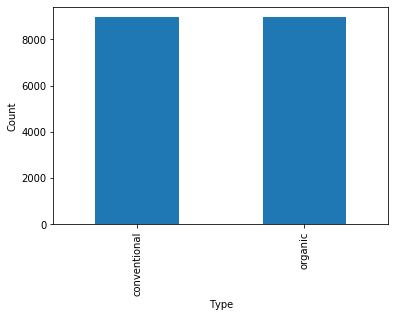

In [167]:
# Barplot for Type

plt.figure(figsize=(6,4))

avocado['type'].value_counts().plot(kind = "bar")
#plt.title('Type')
plt.xlabel('Type')
plt.ylabel('Count')

Our target variable for Logistic regression seems normally distributed which is good for us.

Text(0, 0.5, 'Count')

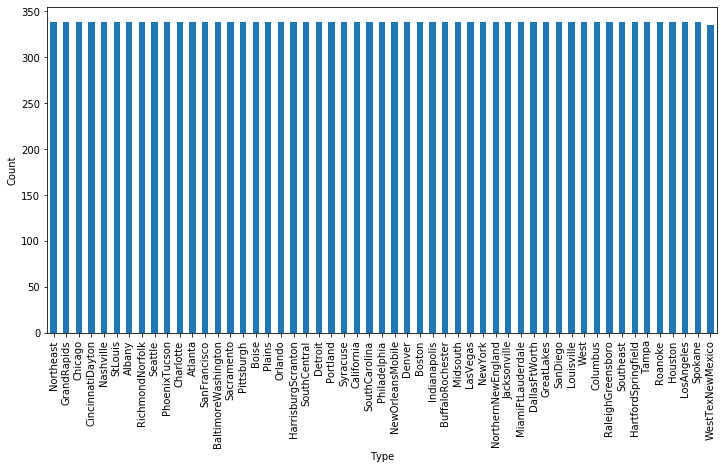

In [168]:
# Barplot for Region

plt.figure(figsize=(12,6))

avocado['region'].value_counts().plot(kind = "bar")
#plt.title('Categorical Variable: Region')
plt.xlabel('Type')
plt.ylabel('Count')

In [169]:
avocado['region'].value_counts()

Northeast              338
GrandRapids            338
Chicago                338
CincinnatiDayton       338
Nashville              338
StLouis                338
Albany                 338
RichmondNorfolk        338
Seattle                338
PhoenixTucson          338
Charlotte              338
Atlanta                338
SanFrancisco           338
BaltimoreWashington    338
Sacramento             338
Pittsburgh             338
Boise                  338
Plains                 338
Orlando                338
HarrisburgScranton     338
SouthCentral           338
Detroit                338
Portland               338
Syracuse               338
California             338
SouthCarolina          338
Philadelphia           338
NewOrleansMobile       338
Denver                 338
Boston                 338
Indianapolis           338
BuffaloRochester       338
Midsouth               338
LasVegas               338
NewYork                338
NorthernNewEngland     338
Jacksonville           338
M

# 2.5) Chi-square test (Test of independence)

Objective: To test whether the average price for each type/region of year is independent.

* $H_0$ - Average prices are independent.
* $H_a$ - Average prices are dependent. 

Superiority level: 5%

## 2.5.1) Type

In [170]:
# pivot table for type

pivot = pd.pivot_table(avocado, index="type", columns="year", values="AveragePrice", aggfunc="mean")
pivot.head()

year              2015      2016      2017      2018
type                                                
conventional  1.079198  1.106705  1.296269  1.129167
organic       1.676552  1.573407  1.737107  1.567421

([<matplotlib.axis.YTick at 0x7fa062e896d0>,
 <a list of 4 Text yticklabel objects>)

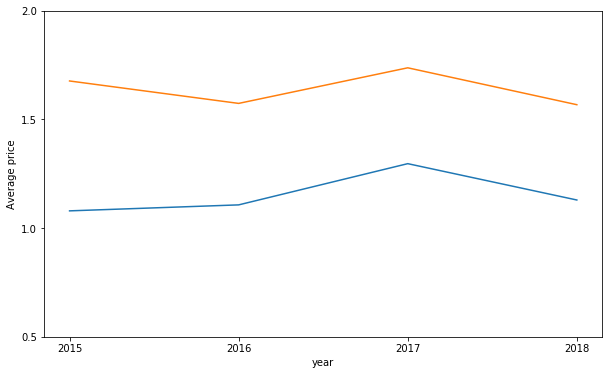

In [171]:
# visualization
plt.figure(figsize=(10,6))
plt.plot(pivot.T.index, pivot.T["conventional"])
plt.plot(pivot.T.index, pivot.T["organic"])
plt.xlabel("year")
plt.xticks([2015,2016,2017,2018])
plt.ylabel("Average price")
plt.yticks([0.5,1,1.5,2])

In [172]:
# stats model
x2, p, dof, expected = sy.stats.chi2_contingency(pivot)

In [173]:
# result
print("x2:{}".format(x2))
print("p:{}".format(p))
print("dof:{}".format(dof))
print("expectd:\n{}".format(expected))

x2:0.008135307711870123
p:0.9998053205574265
dof:3
expectd:
[[1.13808836 1.10685113 1.25274446 1.11365533]
 [1.61766147 1.57326135 1.7806319  1.58293272]]


The p-value is 99% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that the average price are independent.

## 2.5.2) Region

In [174]:
# pivot table for region

pivot = pd.pivot_table(avocado, index="region", columns="year", values="AveragePrice", aggfunc="mean")
pivot.head()

year                     2015      2016      2017      2018
region                                                     
Albany               1.538750  1.533942  1.637830  1.435833
Atlanta              1.380577  1.214135  1.428774  1.288750
BaltimoreWashington  1.368846  1.587596  1.679434  1.378333
Boise                1.373750  1.141923  1.492642  1.492500
Boston               1.473558  1.426154  1.679528  1.576667

([<matplotlib.axis.YTick at 0x7fa062ff1090>,
 <a list of 4 Text yticklabel objects>)

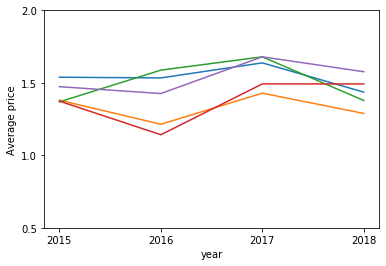

In [175]:
# visualization
plt.figure(figsize=(6,4))
plt.plot(pivot.T.index, pivot.T["Albany"])
plt.plot(pivot.T.index, pivot.T["Atlanta"])
plt.plot(pivot.T.index, pivot.T["BaltimoreWashington"])
plt.plot(pivot.T.index, pivot.T["Boise"])
plt.plot(pivot.T.index, pivot.T["Boston"])
plt.xlabel("year")
plt.xticks([2015,2016,2017,2018])

plt.ylabel("Average price")
plt.yticks([0.5,1,1.5,2])

In [176]:
# stats model
x2, p, dof, expected = sy.stats.chi2_contingency(pivot)

In [177]:
# result
print("x2:{}".format(x2))
print("p:{}".format(p))
print("dof:{}".format(dof))
print("expectd:\n{}".format(expected))

x2:0.6642173069787628
p:1.0
dof:156
expectd:
[[1.51691502 1.47536114 1.66964898 1.48443069]
 [1.31105479 1.27514018 1.44306125 1.2829789 ]
 [1.48430145 1.44364098 1.63375164 1.45251553]
 [1.35759603 1.32040648 1.4942886  1.32852347]
 [1.51927212 1.47765367 1.67224341 1.48673731]
 [1.44191069 1.40241146 1.58709267 1.41103256]
 [1.37982585 1.34202736 1.51875669 1.35027726]
 [1.56124244 1.51847427 1.7184396  1.52780885]
 [1.53702132 1.49491666 1.69177973 1.50410643]
 [1.20584563 1.17281309 1.32725888 1.18002277]
 [1.22104327 1.18759441 1.34398672 1.19489496]
 [1.0745475  1.0451117  1.18274071 1.05153636]
 [1.2141357  1.18087606 1.33638365 1.18813531]
 [1.24081854 1.20682796 1.36575311 1.21424674]
 [1.45160863 1.41184374 1.59776707 1.42052282]
 [1.30957155 1.27369757 1.44142867 1.28152742]
 [1.45998705 1.41999264 1.60698909 1.42872182]
 [1.76822861 1.71979033 1.94626664 1.73036247]
 [1.03313552 1.00483414 1.13715907 1.0110112 ]
 [1.26943759 1.23466303 1.39725374 1.24225293]
 [1.48053424 1.

The p-value is 100% which means that we do not reject the null hypothesis at 95% level of confidence. The null hypothesis was that the average price by regions are independent.

# 2.6) F test (Test of variance)


Objective: To test the difference between 2015 and 2016 price variance.

* $H_0$ - The average variance for 2015 and 2016 are same.
* $H_a$ - The average variance for 2015 and 2016 are different. 

Superiority level: 5%

In [178]:

price_2015 = avocado.query("year==2015")["AveragePrice"].values
price_2016 = avocado.query("year==2016")["AveragePrice"].values
price_2017 = avocado.query("year==2017")["AveragePrice"].values
price_2018 = avocado.query("year==2018")["AveragePrice"].values

# stats model
sy.stats.bartlett(price_2015, price_2016, price_2017, price_2018)

BartlettResult(statistic=272.06905112690663, pvalue=1.101091446097262e-58)

p-value < 0.05

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution \n variance at 2015 0.14 \n variance at 2016 0.16')

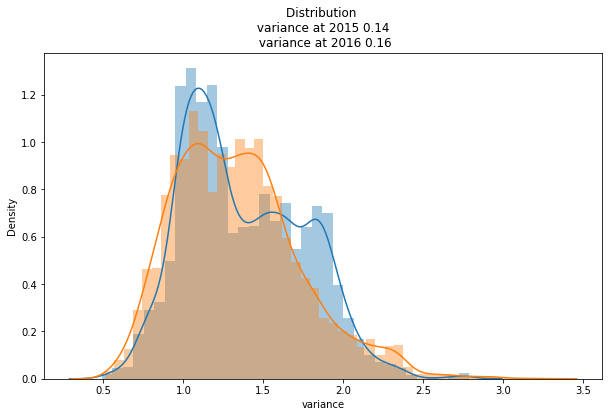

In [179]:
# Visualization check
plt.figure(figsize=(10,6))
sns.distplot(price_2015)
sns.distplot(price_2016)
plt.xlabel("variance")
plt.title("Distribution \n variance at 2015 %.2f \n variance at 2016 %.2f" % (price_2015.var(), price_2016.var()))

p-value<0.05, we can reject the null hypothesis. As a result, the variance are difference.


# 2.6.1) ANOVA, one-way analysis of variance

Objective: Test the average price of 2015, 2016, 2017, 2018.

* $H_0$ - The average variance for each year are same.
* $H_a$ - The average variance for each year are different.

Superiority level: 5%

2015 average price:1.377820722191981
2016 average price:1.3400562409288808
2017 average price:1.5166096866096868
2018 average price:1.3482940251572326


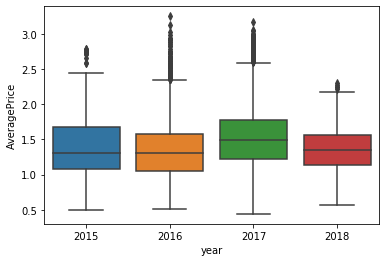

In [180]:
plt.figure(figsize=(6,4))
sns.boxplot(x="year", y="AveragePrice", data=avocado)
print("2015 average price:{}".format(avocado.query("year==2015")["AveragePrice"].mean()))
print("2016 average price:{}".format(avocado.query("year==2016")["AveragePrice"].mean()))
print("2017 average price:{}".format(avocado.query("year==2017")["AveragePrice"].mean()))
print("2018 average price:{}".format(avocado.query("year==2018")["AveragePrice"].mean()))

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

Text(0.5, 1.0, 'Distribution \n variance at 2015 0.14 \n variance at 2016 0.16 \n variance at 2017 0.19 \n variance at 2018 0.09')

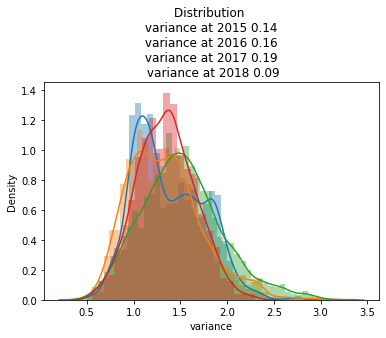

In [181]:
# Visualization check
plt.figure(figsize=(6,4))
sns.distplot(price_2015)
sns.distplot(price_2016)
sns.distplot(price_2017)
sns.distplot(price_2018)
plt.xlabel("variance")
plt.title("Distribution \n variance at 2015 %.2f \n variance at 2016 %.2f \n variance at 2017 %.2f \n variance at 2018 %.2f" % (price_2015.var(), price_2016.var(), price_2017.var(),price_2018.var()))

## 2.6.2) Perform normality test on four data (Shapiro Wilk Test)

In [182]:
# Shapiro Wilk test

print("Shapiro Wilk test")
print("price_2015 p-value:{}:".format(stats.shapiro(price_2015[:4999])[1]))
print("price_2016 p-value:{}:".format(stats.shapiro(price_2016[:4999])[1]))
print("price_2017 p-value:{}:".format(stats.shapiro(price_2017[:4999])[1]))
print("price_2018 p-value:{}:".format(stats.shapiro(price_2018[:4999])[1]))

Shapiro Wilk test
price_2015 p-value:1.0394649736425564e-34:
price_2016 p-value:6.340932901619683e-34:
price_2017 p-value:3.508603614200343e-18:
price_2018 p-value:0.03347940370440483:


all p-values < 0.05

In [183]:
# Reference) Parametric version, if can be eaual variances.
f, p = stats.f_oneway(price_2015, price_2016, price_2017, price_2018)

print("p-value:{}".format(p))

p-value:2.578688199915362e-136


p-value<0.05, we can reject the null hypothesis. As a result, the averages are different.

# 2.7) ANOVA, two-way analysis of variance using OLS

Objective: Test the average price of (2015, 2016, 2017, 2018) vs (conventional, organic).

* $H_0$ -: The average variance for each are same.

* $H_a$ -: The average variance for each are different.


Superiority level: 5%

In [184]:
# Check data frame summary
avocado.groupby(["year", "type"])["AveragePrice"].mean()

year  type        
2015  conventional    1.079198
      organic         1.676552
2016  conventional    1.106705
      organic         1.573407
2017  conventional    1.296269
      organic         1.737107
2018  conventional    1.129167
      organic         1.567421
Name: AveragePrice, dtype: float64

In [185]:
# Create dataframe
sample_data = avocado[["AveragePrice", "type", "year"]]
sample_data.head()

AveragePrice          type  year
0          1.33  conventional  2015
1          1.35  conventional  2015
2          0.93  conventional  2015
3          1.08  conventional  2015
4          1.28  conventional  2015

In [186]:
# Statsmodel
formula = 'AveragePrice ~ C(type)+C(year) + C(type):C(year)'

model = ols(formula, sample_data).fit()

# Result
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AveragePrice   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     1846.
Date:                Fri, 08 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:10:21   Log-Likelihood:                -4325.9
No. Observations:               17911   AIC:                             8668.
Df Residuals:                   17903   BIC:                             8730.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              1.0792      0.006    183.861      0.000       1.068       1.091
C(type)[T.organic]                     0.5974      0.008     71.956      0.000       0.581       0.614
C(year)[T.2016]                        0.0275      0.008      3.314      0.001       0.011       0.044
C(year)[T.2017]                        0.2171      0.008     26.274      0.000       0.201       0.233
C(year)[T.2018]                        0.0500      0.014      3.686      0.000       0.023       0.077
C(type)[T.organic]:C(year)[T.2016]    -0.1307      0.012    -11.129      0.000      -0.154      -0.108
C(type)[T.organic]:C(year)[T.2017]    -0.1565      0.012    -13.394      0.000      -0.179      -0.134
C(type)[T.organic]:C(year)[T.2018]    -0.1591      0.019     -8.299      0.000      -0.197      -0.122
==============================================================================
Omnibus:                      721.577   Durbin-Watson:                   0.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1410.742
Skew:                           0.301   Prob(JB):                    4.58e-307
Kurtosis:                       4.236   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

                      sum_sq       df             F         PR(>F)
C(type)          1105.029735      1.0  11637.792996   0.000000e+00
C(year)           101.336738      3.0    355.747889  1.993786e-224
C(type):C(year)    20.665719      3.0     72.548080   1.242532e-46
Residual         1699.922602  17903.0           NaN            NaN


The p-value is small for all variables and interactions, and the null hypothesis can be rejected.
Therefore, each average is different.

# 3) Data Preparation 

## 3.1) Date Time Conversion

In [188]:
#Converting our data type of 'Date' to datetime
avocado['Date'] = pd.to_datetime(avocado['Date'])

In [189]:
#Creating seperate columns for month, year & day from 'Date'
avocado['year']= avocado['Date'].dt.year
avocado['month']= avocado['Date'].dt.month
avocado['day']= avocado['Date'].dt.day
avocado

Unnamed: 0       Date  AveragePrice  Total Volume  Small_Medium  \
0               0 2015-12-27          1.33      64236.62       1036.74   
1               1 2015-12-20          1.35      54876.98        674.28   
2               2 2015-12-13          0.93     118220.22        794.70   
3               3 2015-12-06          1.08      78992.15       1132.00   
4               4 2015-11-29          1.28      51039.60        941.48   
...           ...        ...           ...           ...           ...   
18244           7 2018-02-04          1.63      17074.83       2046.96   
18245           8 2018-01-28          1.71      13888.04       1191.70   
18246           9 2018-01-21          1.87      13766.76       1191.92   
18247          10 2018-01-14          1.93      16205.22       1527.63   
18248          11 2018-01-07          1.62      17489.58       2894.77   

           Large  ExtraLarge  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0       54454.85       48.16     8696.87     8603.62       93.25          0.0   
1       44638.81       58.33     9505.56     9408.07       97.49          0.0   
2      109149.67      130.50     8145.35     8042.21      103.14          0.0   
3       71976.41       72.58     5811.16     5677.40      133.76          0.0   
4       43838.39       75.78     6183.95     5986.26      197.69          0.0   
...          ...         ...         ...         ...         ...          ...   
18244    1529.20        0.00    13498.67    13066.82      431.85          0.0   
18245    3431.50        0.00     9264.84     8940.04      324.80          0.0   
18246    2452.79      727.94     9394.11     9351.80       42.31          0.0   
18247    2981.04      727.01    10969.54    10919.54       50.00          0.0   
18248    2356.13      224.53    12014.15    11988.14       26.01          0.0   

               type  year            region  month  day  
0      conventional  2015            Albany     12   27  
1      conventional  2015            Albany     12   20  
2      conventional  2015            Albany     12   13  
3      conventional  2015            Albany     12    6  
4      conventional  2015            Albany     11   29  
...             ...   ...               ...    ...  ...  
18244       organic  2018  WestTexNewMexico      2    4  
18245       organic  2018  WestTexNewMexico      1   28  
18246       organic  2018  WestTexNewMexico      1   21  
18247       organic  2018  WestTexNewMexico      1   14  
18248       organic  2018  WestTexNewMexico      1    7  

[17911 rows x 16 columns]

All rows of data were collected on a Sunday and are a summary of the weeks performance for avocado sales, because of this Day of week and day are useless to our investigation and will be dropped at the end of Data prep

In [190]:
#Converting number of month to Month name
dw_mapping={
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April', 
    5: 'May',
    6: 'June', 
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
} 
avocado['month']=avocado['Date'].dt.month.map(dw_mapping)
avocado

Unnamed: 0       Date  AveragePrice  Total Volume  Small_Medium  \
0               0 2015-12-27          1.33      64236.62       1036.74   
1               1 2015-12-20          1.35      54876.98        674.28   
2               2 2015-12-13          0.93     118220.22        794.70   
3               3 2015-12-06          1.08      78992.15       1132.00   
4               4 2015-11-29          1.28      51039.60        941.48   
...           ...        ...           ...           ...           ...   
18244           7 2018-02-04          1.63      17074.83       2046.96   
18245           8 2018-01-28          1.71      13888.04       1191.70   
18246           9 2018-01-21          1.87      13766.76       1191.92   
18247          10 2018-01-14          1.93      16205.22       1527.63   
18248          11 2018-01-07          1.62      17489.58       2894.77   

           Large  ExtraLarge  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0       54454.85       48.16     8696.87     8603.62       93.25          0.0   
1       44638.81       58.33     9505.56     9408.07       97.49          0.0   
2      109149.67      130.50     8145.35     8042.21      103.14          0.0   
3       71976.41       72.58     5811.16     5677.40      133.76          0.0   
4       43838.39       75.78     6183.95     5986.26      197.69          0.0   
...          ...         ...         ...         ...         ...          ...   
18244    1529.20        0.00    13498.67    13066.82      431.85          0.0   
18245    3431.50        0.00     9264.84     8940.04      324.80          0.0   
18246    2452.79      727.94     9394.11     9351.80       42.31          0.0   
18247    2981.04      727.01    10969.54    10919.54       50.00          0.0   
18248    2356.13      224.53    12014.15    11988.14       26.01          0.0   

               type  year            region     month  day  
0      conventional  2015            Albany  December   27  
1      conventional  2015            Albany  December   20  
2      conventional  2015            Albany  December   13  
3      conventional  2015            Albany  December    6  
4      conventional  2015            Albany  November   29  
...             ...   ...               ...       ...  ...  
18244       organic  2018  WestTexNewMexico  February    4  
18245       organic  2018  WestTexNewMexico   January   28  
18246       organic  2018  WestTexNewMexico   January   21  
18247       organic  2018  WestTexNewMexico   January   14  
18248       organic  2018  WestTexNewMexico   January    7  

[17911 rows x 16 columns]

Text(0.5, 1.0, 'Average Price of Avocado According to month')

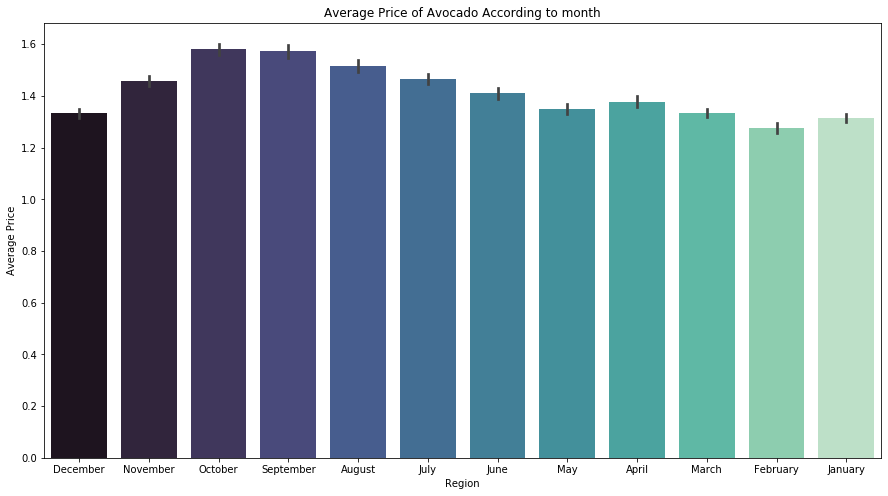

In [191]:
# Average price by month

plt.figure(figsize=(15,8))
sns.barplot(x=avocado['month'], y=avocado['AveragePrice'], palette="mako")

#plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to month')

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

Text(0, 0.5, 'Density')

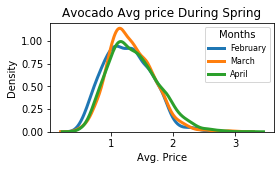

In [192]:
plt.figure(figsize=(4,2))

# List of types
types = ['February', 'March', 'April']

# Iterate through the five airlines
for i in types:
    # Subset to the airline
    subset = avocado[avocado['month'] == i]
    
    # Draw the density plot
    sns.distplot(subset['AveragePrice'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Months')
plt.title('Avocado Avg price During Spring')
plt.xlabel('Avg. Price')
plt.ylabel('Density')

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

Text(0, 0.5, 'Density')

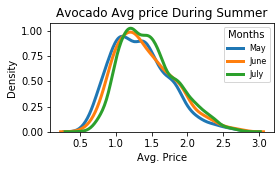

In [193]:
plt.figure(figsize=(4,2))

# List of types
types = ['May','June', 'July']

# Iterate through the five airlines
for i in types:
    # Subset to the airline
    subset = avocado[avocado['month'] == i]
    
    # Draw the density plot
    sns.distplot(subset['AveragePrice'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Months')
plt.title('Avocado Avg price During Summer')
plt.xlabel('Avg. Price')
plt.ylabel('Density')

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

Text(0, 0.5, 'Density')

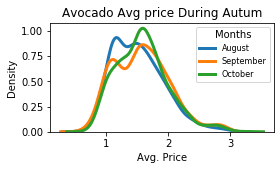

In [194]:
plt.figure(figsize=(4,2))

# List of types
types = ['August','September','October']

# Iterate through the five airlines
for i in types:
    # Subset to the airline
    subset = avocado[avocado['month'] == i]
    
    # Draw the density plot
    sns.distplot(subset['AveragePrice'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Months')
plt.title('Avocado Avg price During Autum')
plt.xlabel('Avg. Price')
plt.ylabel('Density')

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

Text(0, 0.5, 'Density')

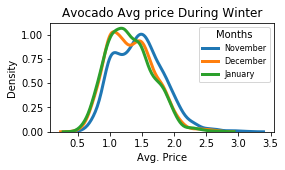

In [195]:
plt.figure(figsize=(4,2))

# List of types
types = ['November','December','January']

# Iterate through the five airlines
for i in types:
    # Subset to the airline
    subset = avocado[avocado['month'] == i]
    
    # Draw the density plot
    sns.distplot(subset['AveragePrice'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)
    
# Plot formatting
plt.legend(prop={'size': 8}, title = 'Months')
plt.title('Avocado Avg price During Winter')
plt.xlabel('Avg. Price')
plt.ylabel('Density')

## 3.2) Dummy Encoding 

#Implementing dummy encoding for Regions
avocado = pd.get_dummies(avocado, columns=["region"])
avocado.head()

Again To avoid high level of dimensionality when dummy encoding, the months will be grouped into one new variable season

Spring = ['February' 'March' 'April']

Summer = ['June' 'July' 'May']

Autumn = ['September' 'October' 'August']

Winter = ['November' 'December' 'January']

In [196]:
#Replacing each month with the above in its place and printing out the count

avocado['month'].replace(to_replace = ['February', 'March', 'April'], value = 'Spring', inplace = True)
avocado['month'].replace(to_replace = ['May','June', 'July'], value = 'Summer', inplace = True)
avocado['month'].replace(to_replace = ['August','September','October'], value = 'Autumn', inplace = True)
avocado['month'].replace(to_replace = ['January','November','December'], value = 'Winter', inplace = True)

avocado['month'].value_counts()

Spring    4876
Winter    4663
Summer    4238
Autumn    4134
Name: month, dtype: int64

In [197]:
avocado = avocado.rename(columns={'month':'season'})

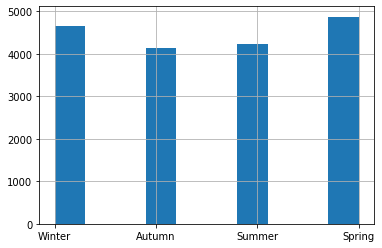

In [198]:
#printing out histogram for the seasons
avocado.season.hist()

In [199]:
#Implementing dummy encoding for Regions
avocado = pd.get_dummies(avocado, columns=["region","type","season", "year"], drop_first = True)
avocado.head()

Unnamed: 0       Date  AveragePrice  Total Volume  Small_Medium      Large  \
0           0 2015-12-27          1.33      64236.62       1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98        674.28   44638.81   
2           2 2015-12-13          0.93     118220.22        794.70  109149.67   
3           3 2015-12-06          1.08      78992.15       1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60        941.48   43838.39   

   ExtraLarge  Total Bags  Small Bags  Large Bags  ...  region_Tampa  \
0       48.16     8696.87     8603.62       93.25  ...             0   
1       58.33     9505.56     9408.07       97.49  ...             0   
2      130.50     8145.35     8042.21      103.14  ...             0   
3       72.58     5811.16     5677.40      133.76  ...             0   
4       75.78     6183.95     5986.26      197.69  ...             0   

   region_West  region_WestTexNewMexico  type_organic  season_Spring  \
0            0                        0             0              0   
1            0                        0             0              0   
2            0                        0             0              0   
3            0                        0             0              0   
4            0                        0             0              0   

   season_Summer  season_Winter  year_2016  year_2017  year_2018  
0              0              1          0          0          0  
1              0              1          0          0          0  
2              0              1          0          0          0  
3              0              1          0          0          0  
4              0              1          0          0          0  

[5 rows x 71 columns]

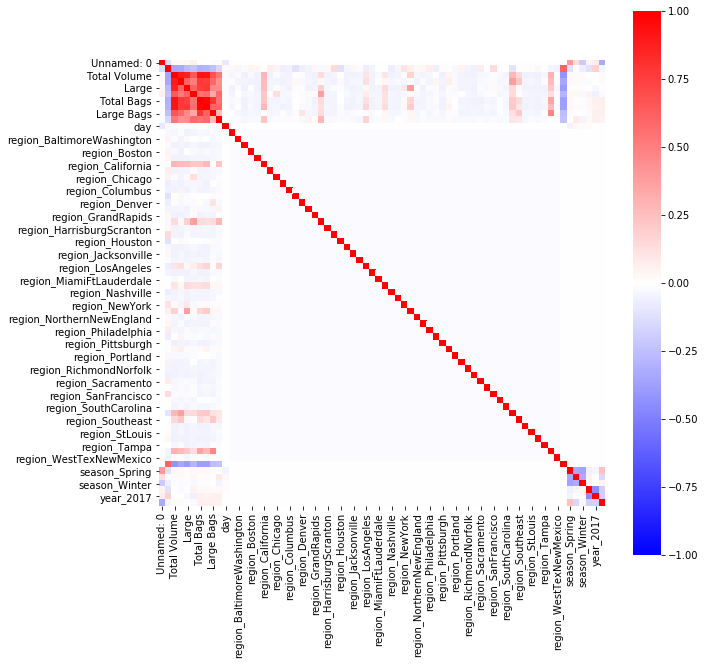

In [200]:
# Correlation
matrix = avocado.corr()
plt.figure(figsize=(10,10))
sns.heatmap(matrix, vmax=1, vmin=-1, cmap="bwr", square=True)

## 3.3) Data Dropping

In [201]:
avocado.describe()

Unnamed: 0  AveragePrice  Total Volume  Small_Medium         Large  \
count  17911.000000  17911.000000  1.791100e+04  1.791100e+04  1.791100e+04   
mean      24.232148      1.407619  5.392587e+05  1.838074e+05  1.882231e+05   
std       15.481003      0.404253  1.224332e+06  5.151059e+05  4.519856e+05   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.057102e+04  8.196600e+02  2.909610e+03   
50%       24.000000      1.370000  1.001541e+05  7.824430e+03  2.670199e+04   
75%       38.000000      1.670000  4.001767e+05  1.014888e+05  1.317552e+05   
max       52.000000      3.250000  1.127475e+07  5.160897e+06  5.402444e+06   

          ExtraLarge    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count   17911.000000  1.791100e+04  1.791100e+04  1.791100e+04   17911.000000   
mean    14551.234381  1.526757e+05  1.162029e+05  3.450569e+04    1967.168041   
std     48817.536762  3.645992e+05  2.787596e+05  1.139477e+05    8186.402196   
min         0.000000  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  4.905195e+03  2.700335e+03  1.129950e+02       0.000000   
50%       164.230000  3.755102e+04  2.453062e+04  2.459220e+03       0.000000   
75%      5736.735000  1.036916e+05  7.928259e+04  1.942171e+04     106.760000   
max    804558.250000  4.145407e+06  3.403581e+06  2.838239e+06  131300.760000   

       ...  region_Tampa   region_West  region_WestTexNewMexico  type_organic  \
count  ...  17911.000000  17911.000000             17911.000000  17911.000000   
mean   ...      0.018871      0.018871                 0.018704      0.499916   
std    ...      0.136074      0.136074                 0.135480      0.500014   
min    ...      0.000000      0.000000                 0.000000      0.000000   
25%    ...      0.000000      0.000000                 0.000000      0.000000   
50%    ...      0.000000      0.000000                 0.000000      0.000000   
75%    ...      0.000000      0.000000                 0.000000      1.000000   
max    ...      1.000000      1.000000                 1.000000      1.000000   

       season_Spring  season_Summer  season_Winter     year_2016  \
count   17911.000000   17911.000000   17911.000000  17911.000000   
mean        0.272235       0.236614       0.260343      0.307744   
std         0.445123       0.425015       0.438834      0.461573   
min         0.000000       0.000000       0.000000      0.000000   
25%         0.000000       0.000000       0.000000      0.000000   
50%         0.000000       0.000000       0.000000      0.000000   
75%         1.000000       0.000000       1.000000      1.000000   
max         1.000000       1.000000       1.000000      1.000000   

          year_2017     year_2018  
count  17911.000000  17911.000000  
mean       0.313550      0.071018  
std        0.463949      0.256862  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 70 columns]

Due to the day of the week being the same value throughout the entire dataset, we can drop the columns Day_of_Week, Day_of_week, day as there is no significance to them for price predictions

From consulting the correlation matrix we can see that certain variables experience the same level of correlation and to avoid multicolinearity we decided to then drop columns

In [202]:
# Delete Volume & Bags
#as the columns relating to number of avocados sorted by size will hold the same amount of information.

avocado.drop(columns=['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'], inplace = True)

In [203]:
# Delete Date column

avocado = avocado.drop(['Date'],axis=1)

In [204]:
# Delete Unnamed: 0 for numerical variables

avocado.drop(columns=['Unnamed: 0'], inplace = True)

#Converting Average price into log form to transform to a normal distribution
avocado['AveragePrice'] = np.log(avocado["AveragePrice"])

In [205]:
avocado.drop(columns=['day'], inplace = True)

In [206]:
avocado.head()

AveragePrice  Small_Medium      Large  ExtraLarge  region_Atlanta  \
0          1.33       1036.74   54454.85       48.16               0   
1          1.35        674.28   44638.81       58.33               0   
2          0.93        794.70  109149.67      130.50               0   
3          1.08       1132.00   71976.41       72.58               0   
4          1.28        941.48   43838.39       75.78               0   

   region_BaltimoreWashington  region_Boise  region_Boston  \
0                           0             0              0   
1                           0             0              0   
2                           0             0              0   
3                           0             0              0   
4                           0             0              0   

   region_BuffaloRochester  region_California  ...  region_Tampa  region_West  \
0                        0                  0  ...             0            0   
1                        0                  0  ...             0            0   
2                        0                  0  ...             0            0   
3                        0                  0  ...             0            0   
4                        0                  0  ...             0            0   

   region_WestTexNewMexico  type_organic  season_Spring  season_Summer  \
0                        0             0              0              0   
1                        0             0              0              0   
2                        0             0              0              0   
3                        0             0              0              0   
4                        0             0              0              0   

   season_Winter  year_2016  year_2017  year_2018  
0              1          0          0          0  
1              1          0          0          0  
2              1          0          0          0  
3              1          0          0          0  
4              1          0          0          0  

[5 rows x 63 columns]

In [207]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                17911 non-null  float64
 1   Small_Medium                17911 non-null  float64
 2   Large                       17911 non-null  float64
 3   ExtraLarge                  17911 non-null  float64
 4   region_Atlanta              17911 non-null  uint8  
 5   region_BaltimoreWashington  17911 non-null  uint8  
 6   region_Boise                17911 non-null  uint8  
 7   region_Boston               17911 non-null  uint8  
 8   region_BuffaloRochester     17911 non-null  uint8  
 9   region_California           17911 non-null  uint8  
 10  region_Charlotte            17911 non-null  uint8  
 11  region_Chicago              17911 non-null  uint8  
 12  region_CincinnatiDayton     17911 non-null  uint8  
 13  region_Columbus             179

In [208]:
avocado.describe().T

count           mean            std   min      25%  \
AveragePrice    17911.0       1.407619       0.404253  0.44     1.10   
Small_Medium    17911.0  183807.409290  515105.860647  0.00   819.66   
Large           17911.0  188223.112232  451985.648442  0.00  2909.61   
ExtraLarge      17911.0   14551.234381   48817.536762  0.00     0.00   
region_Atlanta  17911.0       0.018871       0.136074  0.00     0.00   
...                 ...            ...            ...   ...      ...   
season_Summer   17911.0       0.236614       0.425015  0.00     0.00   
season_Winter   17911.0       0.260343       0.438834  0.00     0.00   
year_2016       17911.0       0.307744       0.461573  0.00     0.00   
year_2017       17911.0       0.313550       0.463949  0.00     0.00   
year_2018       17911.0       0.071018       0.256862  0.00     0.00   

                     50%         75%         max  
AveragePrice        1.37       1.670        3.25  
Small_Medium     7824.43  101488.815  5160896.68  
Large           26701.99  131755.215  5402444.45  
ExtraLarge        164.23    5736.735   804558.25  
region_Atlanta      0.00       0.000        1.00  
...                  ...         ...         ...  
season_Summer       0.00       0.000        1.00  
season_Winter       0.00       1.000        1.00  
year_2016           0.00       1.000        1.00  
year_2017           0.00       1.000        1.00  
year_2018           0.00       0.000        1.00  

[63 rows x 8 columns]

In [209]:
# Remove the zero values

avocado = avocado[avocado.Small_Medium != 0]
avocado = avocado[avocado.Large != 0]
avocado= avocado[avocado.ExtraLarge != 0]


In [210]:
# Check info

avocado.shape

(12414, 63)

In [211]:
avocado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 0 to 18248
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AveragePrice                12414 non-null  float64
 1   Small_Medium                12414 non-null  float64
 2   Large                       12414 non-null  float64
 3   ExtraLarge                  12414 non-null  float64
 4   region_Atlanta              12414 non-null  uint8  
 5   region_BaltimoreWashington  12414 non-null  uint8  
 6   region_Boise                12414 non-null  uint8  
 7   region_Boston               12414 non-null  uint8  
 8   region_BuffaloRochester     12414 non-null  uint8  
 9   region_California           12414 non-null  uint8  
 10  region_Charlotte            12414 non-null  uint8  
 11  region_Chicago              12414 non-null  uint8  
 12  region_CincinnatiDayton     12414 non-null  uint8  
 13  region_Columbus             124

# 4) Statistical tests 


***Based on Noel's code**

In [212]:
import plotly.graph_objects as go

#from sklearn.linear_model import LinearRegression
 

**Noel's code**

"Standardised residuals, often called *internally studentised residuals* are obtained by dividing each residual by an estimate of its standard deviation. This allows us to measure the magnitude of the residuals in units of standard deviation, permitting the easy identification of outliers. A function to calculate standardised residuals is defined below and will be used in the **scale-location plot**."

In [213]:
def standardise_residuals(X,Y):
    X = np.array(X, dtype=float)
    Y = np.array(Y, dtype=float)
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    n = len(X)
    diff_mean_sqr = np.dot((X - mean_X), (X - mean_X))
    beta1 = np.dot((X - mean_X), (Y - mean_Y)) / diff_mean_sqr
    beta0 = mean_Y - beta1 * mean_X
    y_hat = beta0 + beta1 * X
    residuals = Y - y_hat
    h_ii = (X - mean_X) ** 2 / diff_mean_sqr + (1 / n)
    Var_e = math.sqrt(sum((Y - y_hat) ** 2)/(n-2))
    SE_regression = Var_e*((1-h_ii) ** 0.5)
    standardised_residuals = residuals/SE_regression
    return standardised_residuals

**Noel's code**


"The **actual vs fitted** plot allows us to visually compare the predicted values and the actual values. Ideally, the individual points in this plot should be close to forming to a 45 degree straight line, indicating that predicted values are very close to their respective actual values. In the code below, we define a function to produce this plot using the *plotly* library as a base, taking the *actual (y)* values and *predicted (y_hat)* values as arguments."


In [214]:
def actual_vs_fitted_plot(y,yhat) :
    fig = go.Figure(go.Scatter(
        x=y,
        y=y_hat,
        mode='markers',
        showlegend=False))
    fig.update_layout(
        title="Actuals vs Fitted Values",
        xaxis_title="Actual Values",
        yaxis_title="Fitted Values"
    )
    fig.show()

**Noel's code**


"A **residuals vs fitted** plot shows the values of residuals on the y axis and the fitted values on the x axis. This type of plot is used to identify non-linearity, non-constant error variances, and outliers. The function defined below produces this plot, taking the *actual (y)* values and *predicted (y_hat)* values as arguments."

In [215]:
def residuals_vs_fitted_plot(y,yhat) :
    residuals = np.subtract(y,yhat)
    loess = sm.nonparametric.lowess(residuals,yhat,it=0)
    fig = go.Figure(go.Scatter(
        x=yhat,
        y=residuals,
        mode='markers',
        showlegend=False))
    fig.add_trace(go.Scatter(
        x=loess[:,0],
        y=loess[:,1],
        mode='lines',
        showlegend=False)
    )
    fig.update_layout(
        title="Residuals vs Fitted Values",
        xaxis_title="Fitted Values",
        yaxis_title="Residuals"
    )
    fig.show()

**Noel's code**


"The **Normal QQ Plot** is used to assess if the residuals are normally distributed. What we need to see here is the residuals following close to the line. If the residuals deviate far from the line then they are not normally distributed.

* If the points form a curve sitting on top of the line, the residuals are right-skewed, meaning that the bulk of the residuals have lower values with the remainder forming a long tail to the right.
* If the points form a curve sitting below the line, the residuals are left-skewed, meaning that the bulk of the residuals have higher values with the remainder forming a long tail to the left.
* It is common to see some deviation at the ends of line.

The function defined below produces this plot, taking the actual (y) values and predicted (y_hat) values as arguments."

In [216]:
def qq_plot(y,yhat) :
    if len(y) != len(yhat) :
        print('Both y and yhat must have the same length')
    else :
        residuals = np.subtract(y,yhat)
        theoretical_quantiles = np.random.normal(loc=0,scale=1,size=len(y))
        fig = go.Figure(go.Scatter(
            x = np.sort(theoretical_quantiles),
            y = np.sort(standardise_residuals(y,yhat)),
            mode='markers',
            showlegend=False))
        fig.add_trace(go.Scatter(
            x = theoretical_quantiles, 
            y = theoretical_quantiles, 
            mode = 'lines',
            showlegend = False)
        )
        fig.update_layout(
            title="Normal Quantile-Quantile Plot",
            xaxis_title="Theoretical Quantiles",
            yaxis_title="Sample Quantiles"
        )
        fig.show()

**Noel's code**


"A **scale-location plot** shows the estimated (fitted) values the regression model on the x-axis and the square root of the standardised residuals on the y-axis.

The solid line on the plot should be roughly horizontal, indicating that variance of the residuals is approximately the same for all fitted values (homoscedasticity).

There should be no pattern to the residuals. They should be randomly scattered around the solid line. 

The function defined below produces this plot, taking the actual (y) values and predicted (y_hat) values as arguments."

In [217]:
def scale_location_plot(y,yhat) :
    if len(y) != len(yhat) :
        print('Both y and yhat must have the same length')
    else :
        residuals = np.subtract(y,yhat)
        standardised_residuals = standardise_residuals(y,yhat)
        root_residuals = np.sqrt(np.abs(standardised_residuals))
        loess = sm.nonparametric.lowess(root_residuals,yhat,it=0,delta=0.01 * (max(yhat)-min(yhat)))
        fig = go.Figure(go.Scatter(
            x=yhat,
            y=root_residuals,
            mode='markers',
            showlegend=False))
        fig.add_trace(go.Scatter(
            x=loess[:,0],
            y=loess[:,1],
            mode='lines',
            showlegend=False)
        )
        fig.update_layout(
            title="Scale-Location Plot",
            xaxis_title="Fitted Values",
            yaxis_title="Square Root of Standardised Residuals"
        )
        fig.show()
    

In [218]:
# 25% slipt

train, test = train_test_split(avocado, test_size = 0.25,random_state=4242)

In [219]:
X_train = train.drop(['AveragePrice'],axis=1)
y_train = train['AveragePrice']
X_test = test.drop(['AveragePrice'],axis=1)
y_test = test['AveragePrice']

In [220]:
# Using nomralize = True

lm = LinearRegression(normalize = True).fit(X_train, y_train)

In [221]:
# Predictions on training data to see how model's performance
predictions=lm.predict(X_train)

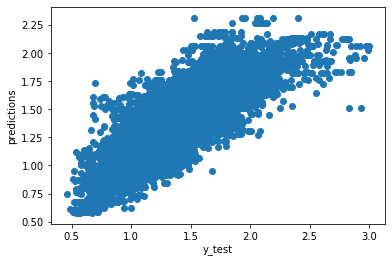

In [222]:
# Actual vs Predicted

fig=plt.figure(figsize=(6,4))

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_train,predictions)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


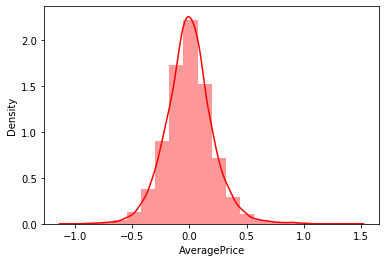

In [223]:
# Residual distribution analysis

fig=plt.figure(figsize=(6,4))
  
sns.distplot(y_train-predictions, color='red',bins=20)



/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'residual')

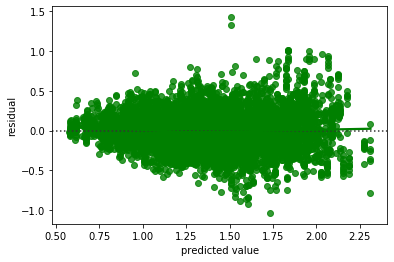

In [224]:
# residual train data -- scatterplot
sns.residplot(predictions,(y_train-predictions),lowess=True,color='g')
plt.xlabel('predicted value')
plt.ylabel('residual')

**Noel's code**

"The first diagnostic plot we will produce is the **Actual vs Fitted Values** plot. "

In [225]:
qq_plot(y_train.to_numpy(),predictions)

**Noel's code**


"Finally we will produce the **Scale-Location plot**."

In [226]:
scale_location_plot(y_train.to_numpy(),predictions)

**Noel's class**


"Here we want to check that the red line is roughly horizontal and that the spread of data either side of the red line does not vary significantly with the fitted values. 

In this instance, neither of these two conditions are met, indicating the presence of unequal variance (heteroscedasticity). "

## 4.1) Statistical tests on residuals

In additional to visual checks that the assumptions of a regression model have been met, we can also use statistical tests.

### Test residuals for normality

* $H_0$ - The residuals are drawn from a normal distribution
* $H_a$ - The residuals are not drawn from a normal distribution

In [227]:
stat, p = sy.stats.normaltest(np.subtract(y_train,predictions))
print('Test statistic: {:.3f}\t p-value: {:.3f}'.format(*[stat,p]))

Test statistic: 533.821	 p-value: 0.000


**Noel's class**


"At $\alpha$ = 0.05, the returned p value would lead us to reject the null hypothesis in favour of the alternative hypothesis and conclude that the residuals of the regression are not drawn from a normal distribution.

## 4.2) Test residuals for heteroscedasticity

The Breusch Pagan test is used to check for equality of variance. In this case, we are using it to check for equality of variances (homoscedasticity) or its absence (heteroscedasticity) in the residuals. "

$H_0$ - The error variances in the residuals are equal

$H_a$ - The error variances in the residuals are not equal

In [228]:
bp_test = sm.stats.diagnostic.het_breuschpagan(
    np.subtract(y_train,predictions),
    X_train.to_numpy())

In [229]:
bp_test_string = 'LM Statistic {:.3f}\t LM-Test p-value {:.3f}\t F Statistic {:.3f}\t F-Test p-value {:.3f}'
print(bp_test_string.format(*bp_test))

LM Statistic 3017.215	 LM-Test p-value 0.000	 F Statistic 71.519	 F-Test p-value 0.000


Based on the p-value < 0.05 que can reject the null hypothesis. Therefore, the error variances in the residual are not equal.

## 4.3) Test residuals for autocorrelation

**Noel's class**


"The Durbin-Watson test is used to check for the presence of one-lag serial correlation (autocorrelation) in a data series. In this case, we will use it to check whether or not the residuals in our regression are correlated with each other."

In [230]:
sm.stats.stattools.durbin_watson(np.subtract(y_train,predictions))

1.9926548797633712

A value close to 2 indicates that serial correlation is not present.

# 5) Preprocessing 

As we are predicting the price of the avocados we are going to put the prices column in the Y and rest of the data in X

## 5.1) Train & Test split

In [231]:
X = avocado.drop(['AveragePrice'], axis = 1)
y = avocado['AveragePrice']

In [232]:
#Using a 75 - 25 split for initial model training 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4242)

In [233]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

shape of X and y respectively(train) : (9310, 62) (9310,)
shape of X and y respectively(test) : (3104, 62) (3104,)


As the dataset is medium in size we can perform a 75 - 25 train test split over the dataset.

## 5.2) Standard Scaling

As shown below the range of values for nondummy encoded variables is quite large and will impact our accuracies, especially as the majortiy of variables have a value of 0 or 1 due to encoding. We will use a Standardscaler to reduce this range to a more managable one

In [234]:
# Scaling

sc = StandardScaler()


X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)



As shown previously in part 2, we have normalised the our dependent variable using the log function and do not neeed to preform scaling on it only on the independent variables

# 6) Models

## 6.1) Multiple Linear Regression

In [235]:
# Calling the model
lm = LinearRegression()

# Fitting
lm.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [236]:
# print the intercept
print(lm.intercept_)

1.317751879699248


In [237]:
# coefficients

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
Small_Medium                  -0.006644
Large                         -0.026636
ExtraLarge                     0.009232
region_Atlanta                -0.031720
region_BaltimoreWashington    -0.009840
...                                 ...
season_Summer                 -0.058546
season_Winter                 -0.087180
year_2016                     -0.000736
year_2017                      0.085143
year_2018                      0.021640

[62 rows x 1 columns]

In [238]:
# Comparing Train x Test metrics

# Predictions
pred_train_lin= lm.predict(X_train_std)
predictions = lm.predict(X_test_std)

# Train
print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_lin))
print('MSE_train:', metrics.mean_squared_error(y_train, pred_train_lin))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_lin)))

# Test

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

# R2 train vs test
print('R2_score_train:', metrics.r2_score(y_train,pred_train_lin))
print('R2 score:', metrics.r2_score(y_test,predictions))

MAE_train: 0.1565597678465069
MSE_train: 0.043595320568037985
RMSE_train: 0.20879492467020835
MAE: 0.15956193213399508
MSE: 0.04597264831269825
RMSE: 0.21441233246410582
R2_score_train: 0.7048173527543183
R2 score: 0.6985343770397485


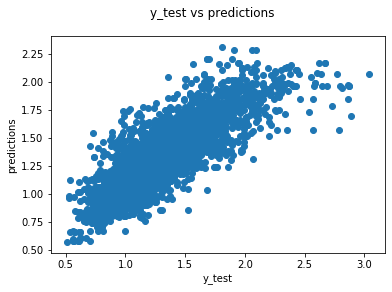

In [239]:
fig=plt.figure(figsize=(6,4))
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,predictions)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



((array([-3.51091594, -3.26777694, -3.13335349, ...,  3.13335349,
          3.26777694,  3.51091594]),
  array([-1.2198891 , -1.18906814, -1.00634288, ...,  0.72767823,
          0.76435656,  0.81399382])),
 (0.21148863496892933, 0.01637945701883561, 0.988244568705501))

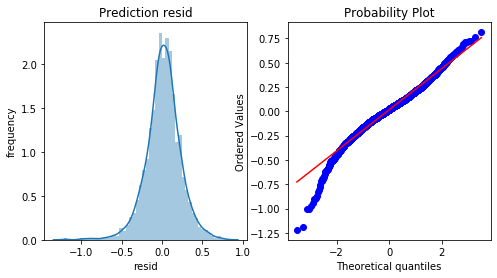

In [240]:
# Residual test analysis
resid = predictions - y_test

# Distribution
fig, ax = plt.subplots(1,2,figsize=(8,4))
sns.distplot(resid, ax=ax[0])
ax[0].set_xlabel("resid")
ax[0].set_ylabel("frequency")
ax[0].set_title("Prediction resid")

# Probability  plot
stats.probplot(resid, plot=ax[1])

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'residual')

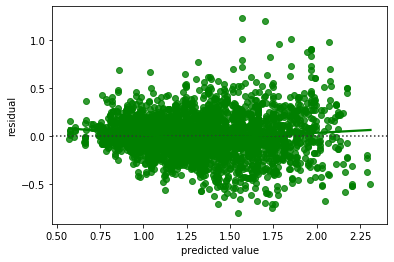

In [241]:
# Residual x predicted values

sns.residplot(predictions,(y_test-predictions),lowess=True,color='g')
plt.xlabel('predicted value')
plt.ylabel('residual')

In [242]:
# Actual vs Predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error.head(10)

Actual Values  Predicted Values
0           1.18          1.243475
1           2.15          1.893565
2           1.79          1.740441
3           1.82          1.600783
4           1.01          1.003697
5           0.89          0.954263
6           1.16          1.155688
7           1.25          1.331462
8           0.95          0.970464
9           1.43          1.080189

# 6.2) Ridge Regression

In [243]:
# Library
from sklearn.linear_model import Ridge

# Instance
ri = Ridge()

In [244]:
# Training and score
params = {'alpha': [1000, 100, 10, 1, 0.1, 0.01, 0.001]}

# Fitting
cv_r = GridSearchCV(ri, params, cv=10, n_jobs =1)
cv_r.fit(X_train_std, y_train)

print("Best params:{}".format(cv_r.best_params_))

Best params:{'alpha': 1}


In [245]:
# Comparing Train x Test metrics

# best parameter
best_r = cv_r.best_estimator_

# Predictions
pred_train_ri= best_r.predict(X_train_std)
predictions_ri = best_r.predict(X_test_std)

# Train
print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_ri))
print('MSE_train:', metrics.mean_squared_error(y_train, pred_train_ri))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_ri)))

# Test

print('MAE:', metrics.mean_absolute_error(y_test, predictions_ri))
print('MSE:', metrics.mean_squared_error(y_test, predictions_ri))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_ri)))

# R2 train vs test
print('R2_score_train:', metrics.r2_score(y_train,pred_train_ri))
print('R2 score:', metrics.r2_score(y_test,predictions_ri))

MAE_train: 0.15655813469197394
MSE_train: 0.04359534587639132
RMSE_train: 0.2087949852759671
MAE: 0.1595489929161996
MSE: 0.0459697764559853
RMSE: 0.21440563531769705
R2_score_train: 0.7048171813921942
R2 score: 0.6985532092389973


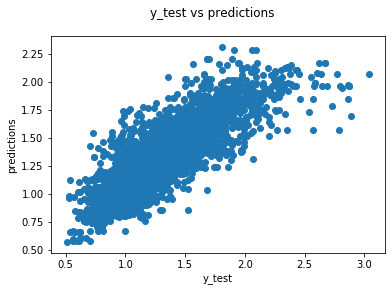

In [246]:
fig=plt.figure(figsize=(6,4))
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,predictions_ri)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



((array([-3.51091594, -3.26777694, -3.13335349, ...,  3.13335349,
          3.26777694,  3.51091594]),
  array([-1.22014894, -1.18902449, -1.00652102, ...,  0.72761341,
          0.76427976,  0.81394763])),
 (0.21147875098775373, 0.016379457018835655, 0.9882294312521823))

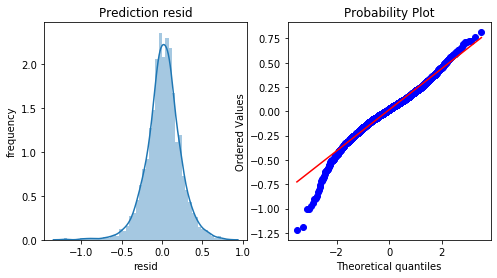

In [247]:
# Residual training analysis
resid = predictions_ri - y_test

# Distribution
fig, ax = plt.subplots(1,2,figsize=(8,4))
sns.distplot(resid, ax=ax[0])
ax[0].set_xlabel("resid")
ax[0].set_ylabel("frequency")
ax[0].set_title("Prediction resid")

# Probability  plot
stats.probplot(resid, plot=ax[1])

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'residual')

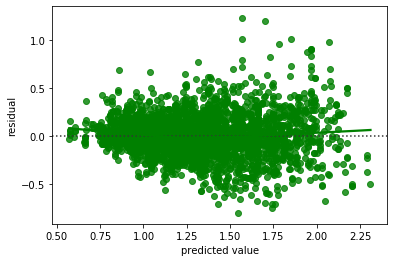

In [248]:
# Residual x predicted values

sns.residplot(predictions,(y_test-predictions_ri),lowess=True,color='g')
plt.xlabel('predicted value')
plt.ylabel('residual')

In [249]:
# Actual vs Predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions_ri.flatten()})
error.head(10)

Actual Values  Predicted Values
0           1.18          1.243465
1           2.15          1.893552
2           1.79          1.740409
3           1.82          1.600763
4           1.01          1.003686
5           0.89          0.954244
6           1.16          1.155498
7           1.25          1.331676
8           0.95          0.970304
9           1.43          1.080287

# 6.3) Lasso Regression

In [250]:
# Library
from sklearn.linear_model import Lasso

# Instance
la = Lasso()

In [251]:
# Training and score
params = {'alpha': [10, 1, 0.1, 0.01, 0.001, 0.0001]}

# Fitting
cv_l = GridSearchCV(la, params, cv=10, n_jobs =1)
cv_l.fit(X_train_std, y_train)

print("Best params:{}".format(cv_l.best_params_))

Best params:{'alpha': 0.0001}


In [252]:
# Comparing Train x Test metrics

# best params
best_l = cv_l.best_estimator_

# Predictions
pred_train_la= best_l.predict(X_train_std)
predictions_la = best_l.predict(X_test_std)

# Train
print('MAE_train:', metrics.mean_absolute_error(y_train, pred_train_la))
print('MSE_train:', metrics.mean_squared_error(y_train, pred_train_la))
print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, pred_train_la)))

# Test

print('MAE:', metrics.mean_absolute_error(y_test, predictions_la))
print('MSE:', metrics.mean_squared_error(y_test, predictions_la))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_la)))

# R2 train vs test
print('R2_score_train:', metrics.r2_score(y_train,pred_train_la))
print('R2 score:', metrics.r2_score(y_test,predictions_la))

MAE_train: 0.15656944453391522
MSE_train: 0.04360725959388868
RMSE_train: 0.20882351302927712
MAE: 0.15933183178398394
MSE: 0.04590446309124925
RMSE: 0.21425326856608104
R2_score_train: 0.7047365139576258
R2 score: 0.6989815016021836


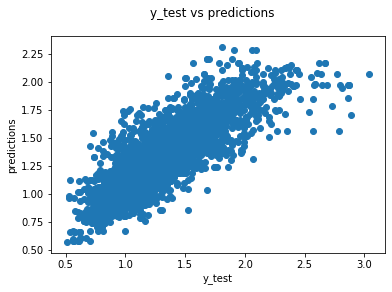

In [253]:
fig=plt.figure(figsize=(6,4))
# Plot-label
fig.suptitle('y_test vs predictions')

#X-label
plt.xlabel('y_test')

# Y-label
plt.ylabel('predictions')
plt.scatter(y_test,predictions_la)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



((array([-3.51091594, -3.26777694, -3.13335349, ...,  3.13335349,
          3.26777694,  3.51091594]),
  array([-1.22014894, -1.18902449, -1.00652102, ...,  0.72761341,
          0.76427976,  0.81394763])),
 (0.21147875098775373, 0.016379457018835655, 0.9882294312521823))

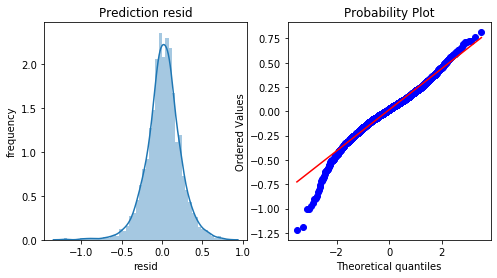

In [254]:
# Residual test analysis
resid2 = predictions_la - y_test

# Distribution
fig, ax = plt.subplots(1,2,figsize=(8,4))
sns.distplot(resid, ax=ax[0])
ax[0].set_xlabel("resid")
ax[0].set_ylabel("frequency")
ax[0].set_title("Prediction resid")

# Probability  plot
stats.probplot(resid, plot=ax[1])

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'residual')

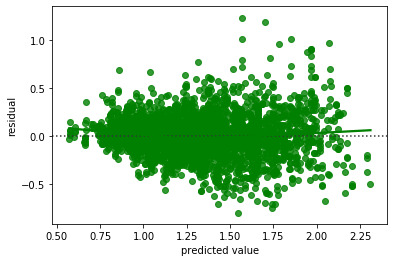

In [255]:
# Residual x predicted values

sns.residplot(predictions,(y_test-predictions_la),lowess=True,color='g')
plt.xlabel('predicted value')
plt.ylabel('residual')

In [256]:
# Actual vs Predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions_la.flatten()})
error.head(10)

Actual Values  Predicted Values
0           1.18          1.242991
1           2.15          1.894811
2           1.79          1.741209
3           1.82          1.600598
4           1.01          1.003464
5           0.89          0.953878
6           1.16          1.151260
7           1.25          1.337185
8           0.95          0.966302
9           1.43          1.081592

# 7) Principle Component Analysis 

In [257]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9310 entries, 6056 to 9793
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Small_Medium                9310 non-null   float64
 1   Large                       9310 non-null   float64
 2   ExtraLarge                  9310 non-null   float64
 3   region_Atlanta              9310 non-null   uint8  
 4   region_BaltimoreWashington  9310 non-null   uint8  
 5   region_Boise                9310 non-null   uint8  
 6   region_Boston               9310 non-null   uint8  
 7   region_BuffaloRochester     9310 non-null   uint8  
 8   region_California           9310 non-null   uint8  
 9   region_Charlotte            9310 non-null   uint8  
 10  region_Chicago              9310 non-null   uint8  
 11  region_CincinnatiDayton     9310 non-null   uint8  
 12  region_Columbus             9310 non-null   uint8  
 13  region_DallasFtWorth        93

In [258]:
# Split data in train and test partition and rename the DF based on PCA preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
X_train_PCAscaled = preprocessing.scale(X_train,with_std = False)
X_test_PCAscaled = preprocessing.scale(X_test,with_std = False)

In [259]:
# Let's try to reduce it to around half meaning n=30
# The 2nd attempt we did n = 5 because we can't actually see in the Scree Plot
pca = PCA(n_components=5, whiten=True).fit(X_train_PCAscaled)
X_train_pca = pca.fit_transform(X_train_PCAscaled)

In [260]:
X_test_pca = pca.transform(X_test_PCAscaled)

In [261]:
pca.explained_variance_

array([4.98015578e+11, 1.31664058e+11, 2.05481430e+09, 3.13276117e-01,
       2.71090198e-01])

In [262]:
pca.explained_variance_ratio_

array([7.88330568e-01, 2.08416777e-01, 3.25265512e-03, 4.95898421e-13,
       4.29120491e-13])

In [263]:
# Checking the how much the variable explain the variable 1

pca.components_[1,]

array([-6.27574332e-01,  7.78060462e-01,  2.77916374e-02, -1.80968295e-08,
        2.60011490e-08, -7.30120344e-09,  2.67918011e-08,  4.10347759e-11,
        3.24265484e-09, -6.50747264e-09,  2.92920532e-08,  4.00330254e-09,
       -7.64353340e-09, -2.47133399e-08,  5.01308771e-09, -6.41812737e-09,
        2.97163763e-09,  8.66419904e-08, -2.45168173e-09,  8.75210625e-09,
       -1.83964157e-08,  8.77427274e-10, -1.34631285e-08, -5.41136276e-09,
       -4.50724982e-08, -1.15108949e-09, -1.92822258e-08,  4.89253232e-08,
       -1.09778549e-08, -1.26844668e-08,  6.45334612e-08,  2.14001577e-07,
        1.96138638e-08, -1.35557137e-08,  9.58982251e-09, -3.08353853e-08,
       -3.03612140e-09, -2.47009401e-08, -5.46059644e-10, -5.97314745e-09,
       -6.83275422e-09, -4.19412982e-09,  5.21586223e-09, -4.94138760e-09,
        1.97122514e-08, -2.40428721e-10, -1.49730527e-08, -9.79688260e-08,
       -9.29870439e-08, -5.06828911e-09, -9.19284639e-09, -1.92188002e-09,
       -1.24626491e-08, -

Text(0, 0.5, 'Eigenvalue')

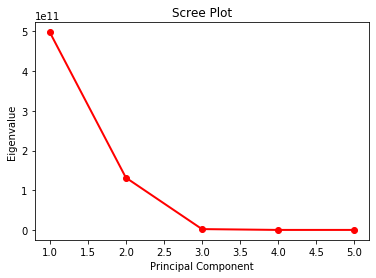

In [264]:
# Scree plot based on n = 30 

principal_component_number = np.arange(5) + 1
plt.plot(principal_component_number, pca.explained_variance_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

As we can see here it's around 2 or 3, the scree plot has a lot of features! We tried n=30 but we can actually see if it is 2 or 3. When we do n = 5 (because we know it's straight from there) we can see the exactly number of features that PCA is telling us.

In [265]:
# After the investigation let's re do all the process

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)
X_train_PCAscaled = preprocessing.scale(X_train,with_std = False)
X_test_PCAscaled = preprocessing.scale(X_test,with_std = False)

In [266]:
# Defining n_components  

pca = PCA(n_components=2, whiten=True).fit(X_train_PCAscaled)
X_train_pca = pca.fit_transform(X_train_PCAscaled)
X_test_pca = pca.transform(X_test_PCAscaled)

## 7.1) Linear Regression with PCA


In [267]:
reg = LinearRegression().fit(X_train_pca, y_train)

In [268]:
y_pred_lin_test = reg.predict(X_test_pca)
y_pred_lin_test

array([1.34886072, 1.3801021 , 0.76202295, ..., 1.16592101, 1.37280659,
       1.36360101])

In [269]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lin_test))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lin_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin_test)))

MAE: 0.2881419818691301
MSE: 0.1295304831214343
RMSE: 0.3599034358288822


In [273]:
r2_score(y_test, y_pred_lin_test)

0.11552117828397324

In [274]:
#Making predictions from the trained model
y_predicted_train = reg.predict(X_train_pca)
y_predicted_test = reg.predict(X_test_pca)

In [275]:
#Printing out accuracies 
print('train data accuracy :',reg.score(X_train_pca,y_train))
print('test data accuracy :',reg.score(X_test_pca,y_test))

print('loss of train data :',mean_squared_error(y_train,y_predicted_train))
print('loss of test data :',mean_squared_error(y_test,y_predicted_test))

train data accuracy : 0.11409549044855394
test data accuracy : 0.11552117828397324
loss of train data : 0.13263722997345795
loss of test data : 0.1295304831214343


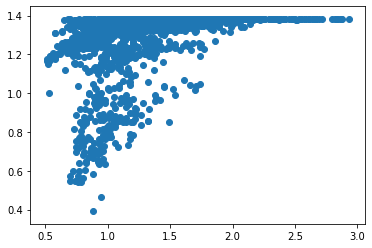

In [276]:
plt.scatter(y_test,y_predicted_test)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



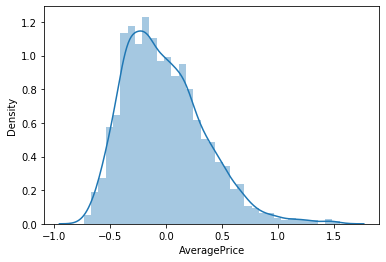

In [277]:

sns.distplot((y_test - y_predicted_test))

PCA actually makes the model worse than the original with all the features! We believe that one of the reasons is that the model is loaded with Dummy-encoded variables for the regions, type, year etc... if we delete those features we are loosing a valuable information!!

## 7.2) Ridge Regression with PCA

In [278]:
ridge_model = Ridge(alpha=1.0,normalize=True)
cv = RepeatedKFold(n_splits=18, n_repeats=3, random_state=42)

MAE = cross_val_score(ridge_model, X_train_pca, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
MAE = np.absolute(MAE)

print('Average MAE: %.3f (%.3f)' % (np.mean(MAE), np.std(MAE)))

Average MAE: 0.294 (0.010)


In [279]:
#Alpha = 1.0
ridge_model.fit(X_train_pca, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [280]:
#Making predictions from the trained model
y_predicted_train_ri = ridge_model.predict(X_train_pca)
y_predicted_test_ri = ridge_model.predict(X_test_pca)

In [281]:
#Printing out accuracies 
print('train data accuracy :',ridge_model.score(X_train_pca,y_train))
print('test data accuracy :',ridge_model.score(X_test_pca,y_test))

print('loss of train data :',mean_squared_error(y_train,y_predicted_train_ri))
print('loss of test data :',mean_squared_error(y_test,y_predicted_test_ri))

train data accuracy : 0.08557161783641554
test data accuracy : 0.08879661083230594
loss of train data : 0.13690781152101705
loss of test data : 0.13344425250543118


## 7.2.1) Hypertuning PCA Ridge Regression Parameters

In [282]:
tune_grid = dict()
tune_grid['alpha'] = [(x/1000) for x in list(range(5,16,1))]
tune_grid

{'alpha': [0.005,
  0.006,
  0.007,
  0.008,
  0.009,
  0.01,
  0.011,
  0.012,
  0.013,
  0.014,
  0.015]}

In [283]:
tune = GridSearchCV(ridge_model, tune_grid, 
                      scoring='neg_mean_absolute_error', 
                      cv=cv)
tune_results = tune.fit(X_train_pca, y_train)

In [284]:
print('MAE: {:.3f}'.format(-tune_results.best_score_))
print('Parameters: {}'.format(tune_results.best_params_))

MAE: 0.291
Parameters: {'alpha': 0.015}


In [285]:
ridge_model = Ridge(alpha=0.005,normalize=True)
ridge_model.fit(X_train_pca, y_train)
y_predicted_ri = ridge_model.predict(X_test_pca)
y_actual_ri = ridge_model.predict(X_train_pca)
print('Test MAE: {:3f}'.format(mean_absolute_error(y_test,y_predicted_ri)))

Test MAE: 0.288078


In [286]:
#Printing out accuracies 
print('train data accuracy :',ridge_model.score(X_train_pca,y_train))
print('test data accuracy :',ridge_model.score(X_test_pca,y_test))
print('loss of train data :',mean_squared_error(y_train,y_predicted_train_ri))
print('loss of test data :',mean_squared_error(y_test,y_predicted_test_ri))

train data accuracy : 0.11409266637265336
test data accuracy : 0.11556820547518631
loss of train data : 0.13690781152101705
loss of test data : 0.13344425250543118


In [287]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted_test_ri))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted_test_ri))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_test_ri)))

MAE: 0.2905167201523451
MSE: 0.13344425250543118
RMSE: 0.365300222427295


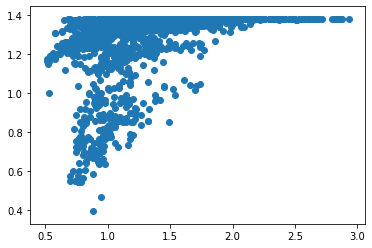

In [288]:
plt.scatter(y_test,y_predicted_ri)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



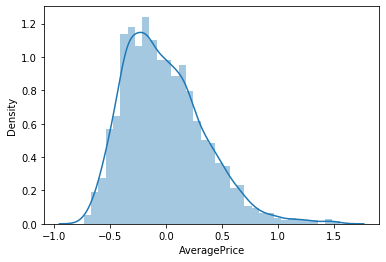

In [289]:

sns.distplot((y_test - y_predicted_ri))

The same analysis as above. PCA is getting it worse!

## 7.3) Lasso Regression with PCA

In [290]:
lasso_model = Lasso(alpha=1.0,normalize=True)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

MAE = cross_val_score(lasso_model, X_train_pca, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
MAE = np.absolute(MAE)
print('Average MAE: %.3f (%.3f)' % (np.mean(MAE), np.std(MAE)))

Average MAE: 0.309 (0.008)


In [291]:
lasso_model.fit(X_train_pca, y_train)
y_predicted_la = lasso_model.predict(X_test_pca)
print('Test MAE: {:3f}'.format(mean_absolute_error(y_test,y_predicted_la)))


Test MAE: 0.307334


In [292]:
#Making predictions from the trained model
y_predicted_train_la = lasso_model.predict(X_train_pca)
y_predicted_test_la = lasso_model.predict(X_test_pca)

In [293]:
#Printing out accuracies 
print('train data accuracy :',lasso_model.score(X_train_pca,y_train))
print('test data accuracy :',lasso_model.score(X_test_pca,y_test))
print('loss of train data :',mean_squared_error(y_train,y_predicted_train_la))
print('loss of test data :',mean_squared_error(y_test,y_predicted_test_la))

train data accuracy : 0.0
test data accuracy : -0.0014617338442979297
loss of train data : 0.14971955616369448
loss of test data : 0.1466624401032062


In [294]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted_test_la))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted_test_la))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_test_la)))

MAE: 0.30733377188368566
MSE: 0.1466624401032062
RMSE: 0.38296532493583046


In [295]:
# Actual vs Predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_predicted_la.flatten()})
error.head(10)

Actual Values  Predicted Values
0           0.85          1.317315
1           1.58          1.317315
2           0.79          1.317315
3           1.68          1.317315
4           1.03          1.317315
5           0.76          1.317315
6           1.71          1.317315
7           1.26          1.317315
8           1.20          1.317315
9           1.00          1.317315

## 7.3.1)   Hypertuning PCA Lasso Regression Parameters

In [296]:
tune_grid = dict()
# tune_grid['alpha'] = [(x/20) for x in list(range(100,121,1))]
tune_grid['alpha'] = [(x/10000000) for x in list(range(8,90,5))]
tune_grid

{'alpha': [8e-07,
  1.3e-06,
  1.8e-06,
  2.3e-06,
  2.8e-06,
  3.3e-06,
  3.8e-06,
  4.3e-06,
  4.8e-06,
  5.3e-06,
  5.8e-06,
  6.3e-06,
  6.8e-06,
  7.3e-06,
  7.8e-06,
  8.3e-06,
  8.8e-06]}

In [297]:
tune = GridSearchCV(lasso_model, tune_grid, 
                      scoring='neg_mean_absolute_error', 
                      cv=cv)
tune_results = tune.fit(X_train_pca, y_train)

In [298]:
print('MAE: {:.3f}'.format(-tune_results.best_score_))
print('Parameters: {}'.format(tune_results.best_params_))

MAE: 0.291
Parameters: {'alpha': 8.8e-06}


In [299]:
lasso_model = Lasso(alpha=0.00000038,normalize=True)
lasso_model.fit(X_train_pca, y_train)
y_predicted_la = lasso_model.predict(X_test_pca)
#print('Test MAE: {:3f}'.format(mean_absolute_error(y_test,y_predicted_test_la)))

In [300]:
#Printing out accuracies 
print('train data accuracy :',lasso_model.score(X_train_pca,y_train))
print('test data accuracy :',lasso_model.score(X_test_pca,y_test))
print('loss of train data :',mean_squared_error(y_train,y_predicted_train_la))
print('loss of test data :',mean_squared_error(y_test,y_predicted_test_la))

train data accuracy : 0.11409547249012486
test data accuracy : 0.11552500372917263
loss of train data : 0.14971955616369448
loss of test data : 0.1466624401032062


In [301]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted_test_la))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted_test_la))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted_test_la)))

MAE: 0.30733377188368566
MSE: 0.1466624401032062
RMSE: 0.38296532493583046


In [302]:
# Actual vs Predicted values

error = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_predicted_test_la.flatten()})
error.head(10)

Actual Values  Predicted Values
0           0.85          1.317315
1           1.58          1.317315
2           0.79          1.317315
3           1.68          1.317315
4           1.03          1.317315
5           0.76          1.317315
6           1.71          1.317315
7           1.26          1.317315
8           1.20          1.317315
9           1.00          1.317315

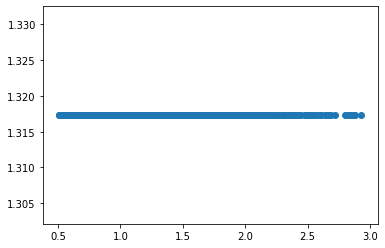

In [303]:
plt.scatter(y_test,y_predicted_test_la)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



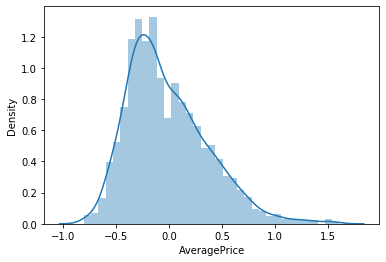

In [304]:

sns.distplot((y_test - y_predicted_test_la))

The same analysis as above! 

# 8) Logistic Regression

In [305]:
# StratifiedKFold
from sklearn.model_selection import StratifiedKFold

# Grid search
from sklearn.model_selection import GridSearchCV

# Learning curve
from sklearn.model_selection import learning_curve

# Validation curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score


# Confusion matrix and scores
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ROC curve
from sklearn.metrics import roc_curve, auc
from scipy import interp

In [306]:
avocado['type_organic'].value_counts()

0    8956
1    3458
Name: type_organic, dtype: int64

In [307]:
# 25% slipt

train, test = train_test_split(avocado, test_size = 0.25,random_state=4242)

In [308]:
# Defining X and y

X_train = train.drop(['type_organic'],axis=1)
y_train = train.filter(['type_organic'])
X_test = test.drop(['type_organic'],axis=1)
y_test = test.filter(['type_organic'])

In [309]:
# Scaling
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [310]:
# Import model
from sklearn.linear_model import LogisticRegression

In [311]:
# Model

logreg = LogisticRegression()
logreg.fit(X_train_std,y_train)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [312]:
# print the intercept for log regression
print(logreg.intercept_)

[-11.30631043]


In [313]:
# Logistic regression coefficients

logreg.coef_

array([[ 2.09684533e+00, -9.85350613e+00, -1.29621034e+01,
        -5.91284216e+00, -7.93522572e-02,  1.17567827e+00,
        -5.57457460e-02,  5.39444144e-01, -5.23271538e-01,
         1.28011737e+00,  5.19584041e-01, -5.47833918e-03,
        -2.74075229e-01,  3.25391566e-01,  6.82114334e-01,
         1.28397253e+00,  2.55146542e-01, -3.66903812e-01,
         1.30098920e+00,  5.52046331e-01,  3.37772843e-01,
         1.30828760e-02,  1.67922787e-01,  3.37369228e-01,
         9.44617393e-02,  1.23929009e+00, -4.14761219e-01,
        -1.12080552e-01,  1.47847577e+00,  2.10343681e-01,
        -2.61615308e-01,  1.67100892e+00,  2.53748513e+00,
        -6.35867905e-02, -2.76541389e-01,  6.40154310e-01,
         5.72366734e-01,  8.71119702e-02,  1.22746958e+00,
         9.57350287e-01,  6.74658606e-01,  7.55090721e-01,
        -3.67052046e-01,  2.57414867e-01,  6.88836565e-01,
         4.45210473e-01,  8.27339335e-01,  7.43582004e-01,
         1.14205112e+00,  1.32994716e+00,  2.05920858e-0

In [314]:
y_pred = logreg.predict(X_test_std)
y_actual = logreg.predict(X_train_std)

In [315]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [316]:
# Confusion matrix for train data
cf_matrix_train = confusion_matrix(y_train, y_actual)
cf_matrix_train

array([[6708,    7],
       [  44, 2551]])

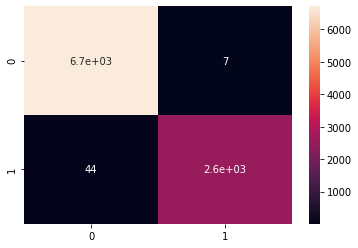

In [317]:
import seaborn as sns
sns.heatmap(cf_matrix_train, annot=True)

In [318]:
# Confusion matrix for test data
cf_matrix_test = confusion_matrix(y_test, y_pred)
cf_matrix_test

array([[2235,    6],
       [  19,  844]])

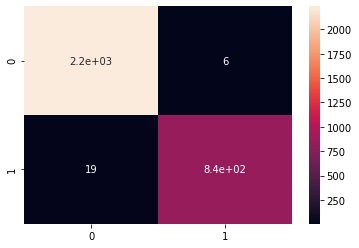

In [319]:
import seaborn as sns
sns.heatmap(cf_matrix_test, annot=True)

In [320]:
# Classification report

from sklearn.metrics import classification_report

In [321]:
# train accuracy

print(classification_report(y_train,y_actual))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6715
           1       1.00      0.98      0.99      2595

    accuracy                           0.99      9310
   macro avg       1.00      0.99      0.99      9310
weighted avg       0.99      0.99      0.99      9310



In [322]:
# test accuracy

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2241
           1       0.99      0.98      0.99       863

    accuracy                           0.99      3104
   macro avg       0.99      0.99      0.99      3104
weighted avg       0.99      0.99      0.99      3104



## 8.1) Hypertunning Logistic Regression

In [323]:
# Log model + Hyperparameters

lr = LogisticRegression(
    random_state = 12345,  
    max_iter = 5000, 
    penalty = 'l2',
    solver='liblinear')
lr.fit(X_train_std,y_train)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=12345, solver='liblinear', tol=0.0001,
                   verbose=0, warm_start=False)

In [324]:
# print the intercept for log regression with adjustments
print(lr.intercept_)

[-9.18549425]


In [325]:
# Logistic regression coefficients with adjustments

lr.coef_

array([[  2.10748311,  -8.36437929, -12.13470772,  -4.89726027,
          0.12256353,   1.15210852,  -0.06728385,   0.53378404,
         -0.42105248,   1.49078303,   0.47452117,   0.64508221,
         -0.12222561,   0.30053397,   0.97029306,   1.21688082,
          0.22308138,  -0.26215745,   1.51133659,   0.51893118,
          0.30870355,   0.92061337,   0.14986409,   0.30883327,
          0.10673695,   1.44434251,  -0.29220451,   0.06288345,
          1.75847563,   0.18818897,  -0.12909639,   1.59305916,
          2.55296614,   0.17762548,  -0.1520203 ,   0.5990328 ,
          0.87079588,   0.07362724,   1.57122291,   0.9012126 ,
          0.62270855,   0.71733211,  -0.23612477,   0.2458898 ,
          0.63852261,   0.47906849,   0.78120709,   0.6935913 ,
          1.32456162,   1.67537727,   0.18995792,   0.23918552,
         -0.47857787,  -0.10415366,   2.11601825,   0.98616252,
          0.86474625,   0.70697653,   0.4943665 ,   0.09353032,
         -0.51230641,  -0.1081796 ]])

In [326]:
# Optimizing the model 

param_range = [0.001, 0.01, 0.1, 1.0, 10, 100]
penalty = ['l1', 'l2']
param_grid = [{"C":param_range, "penalty":penalty}]

# Optimization by Grid search
gs = GridSearchCV(estimator=lr, param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1)

gs = gs.fit(X_train_std, y_train)

print(gs.best_score_)
print(gs.best_params_)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.9993555316863588
{'C': 100, 'penalty': 'l2'}


In [327]:
# Train data validation by best estimator
gs_l = gs.best_estimator_
y_pred_train = gs_l.predict(X_train_std)
print('Train accuracy: %.4f' % gs_l.score(X_train_std, y_pred_train))

Train accuracy: 1.0000


In [328]:
# Test data validation by best estimator
gs_l = gs.best_estimator_
y_pred = gs_l.predict(X_test_std)
print('Test accuracy: %.4f' % gs_l.score(X_test_std, y_test))

Test accuracy: 0.9987


In [330]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

In [337]:
#Get the confusion matrix for train data
cf_matrix_1 = confusion_matrix(y_train, y_pred_train)
print(cf_matrix_1)

[[6715    0]
 [   1 2594]]


In [332]:
#Get the confusion matrix for test data
cf_matrix_2 = confusion_matrix(y_test, y_pred)
print(cf_matrix_2)

[[2239    2]
 [   2  861]]


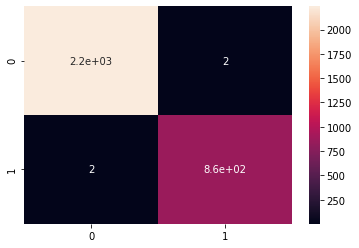

In [333]:
import seaborn as sns
sns.heatmap(cf_matrix_2, annot=True)

In [334]:
# Classification report

from sklearn.metrics import classification_report

In [335]:
# train score 


print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6715
           1       1.00      1.00      1.00      2595

    accuracy                           1.00      9310
   macro avg       1.00      1.00      1.00      9310
weighted avg       1.00      1.00      1.00      9310



In [336]:
# test score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2241
           1       1.00      1.00      1.00       863

    accuracy                           1.00      3104
   macro avg       1.00      1.00      1.00      3104
weighted avg       1.00      1.00      1.00      3104

